# Chronic Kidney Disease Prediction

# Abstract

The objective of this project is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Class(renamed to ChronicKidneyDisease).

# Aim:
In this assignment we aim to develop a complete ML project with

- Checking Data Quality by performing different EDA techniques
- Feature Selection
- Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
- Model Interpretibility
- Reports and Visualizations

# Column Description for our Dataset


##### Kaggle Dataset Link: https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

### Target Variable/Dependent Variable

__ChronicKidneyDisease__ -  Is the person suffering from chronic Kidney Disease. This is the variable we have to predict
Predictor Variables/Independent Variables


### Predictor Variables/Independent Variables

1. __Blood Pressure__ - A condition in which the force of the blood against the artery walls is too high.
2. __SpecificGravity__ - specific gravity, also called relative density, ratio of the density of a substance to that of a standard   substance.
3. __Albumin__-Albumin is a protein made by the liver. A albumin test measures the amount of this protein in the clear liquid       portion of the blood.
4. __Sugar__- A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126      mg/dL or higher indicates you have diabetes.
5. __RedBloodCell__- The results of RBC indices are used to diagnose different types of anemia.
6. __BloodUrea__ - The blood urea test measures how much urea nitrogen is in your blood.
7. __SerumCreatinine__ -A measurement of creatinine in your blood or urine provides clues to help your doctor determine how well the    kidneys are working.
8. __Sodium__-It helps maintain normal blood pressure, supports the work of your nerves and muscles, and regulates your body's fluid    balance. A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).
9. __Pottasium__- Potassium is a chemical that is critical to the function of nerve and muscle cells, including those in your heart. Blood potassium level is normally 3.6 to 5.2 millimoles per liter (mmol/L)
10. __Hemoglobin__- Hemoglobin is a protein in red blood cells that carries oxygen.Normal results for adults vary, but in general       are:Male: 13.8 to 17.2 grams per deciliter (g/dL) or 138 to 172 grams per liter (g/L)
    Female: 12.1 to 15.1 g/dL or 121 to 151 g/L.
11. __WhiteBloodCellsCont__- The normal number of WBCs in the blood is 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L). 
12. __RedBloodCellsCont__- A normal RBC count would be around: men – 4.0 to 5.9 x 10*12/L. women – 3.8 to 5.2 x 10*12/L.
13. __Hypertension__- Having blood pressure measures consistently above normal may result in a diagnosis of  hypertension.

In [1]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool


import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

(CVXPY) Apr 09 08:22:26 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?

# What question are you trying to answer? How did you frame it as an ML task?

- The objective here is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset such as Heloglobin, Specific Gravity, Hypertension, Sugar Levels.
- ChronicKidneyDisease has only binary data so we are assuming that '1' means that the person has a Chronic Kidney Disease and '0' means the person is free of any chronic disease
- Since the target variable ChronicKidneyDisease is binary with only two values ('0' or '1'), we can train a binary classification model using supervised learning algorithms such as logistic regression, decision trees, random forests, or support vector machines.
- Chronic kidney disease (CKD) is a classification problem because it involves categorizing individuals based on the stage and severity of their disease. CKD is a progressive condition that can develop slowly over time, often with few or no symptoms until the disease is advanced.
- In my case, the model is being trained to learn patterns and relationships between various medical parameters.
- Once the model is trained on certain portion of data it can be used to make predictions on new data, where it takes in the different medical parameters for an individual and outputs a prediction of whether or not they have the disease.



# What is human-level performance on that task? What level of performance is needed?
-  Generally, a clinician with experience in diagnosing chronic kidney disease can achieve high accuracy in predicting the disease, often exceeding 90% accuracy in many cases.
- The level of performance needed for chronic kidney disease prediction using ML algorithms may vary depending on the specific application and use case of the model. If the model is able to predict the true positive predictions and false predictions, false predictions will mislead the person of assuming he is not prone to disease  
- A well-designed and validated ML model that achieves high accuracy in predicting chronic kidney disease would be considered beneficial for improving patient outcomes and reducing healthcare costs

In [2]:
#Reading file
#file_url = "https://raw.githubusercontent.com/Akshathapatil1998/ML_Data_Cleaning_and_Feature_Selection_Chronic_Kidney_Disease_Prediction/main/new_model.csv"
data = pd.read_csv(r"C:\Users\Dell\Downloads\new_model.csv")

In [3]:
#Renaming columns 
data = data.rename(columns={"Bp":"BloodPressure","Sg":"SpecificGravity","Al":"Albumin","Su":"Sugar","Rbc":"RedBloodCell","Bu":"BloodUrea","Sc":"SerumCreatinine","Sod":"Sodium","Pot":"Pottasium","Hemo":"Hemoglobin","Wbcc":"WhiteBloodCellsCont","Rbcc":"RedBloodCellsCont","Htn":"Hypertension","Class":"ChronicKidneyDisease"})

# Where did the feature data and label come from?
- This dataset is originally from UCI Machine Learning Repository.
- The dataset contains 400 people data and predtion is made based on 13 different parameters 
1. __Blood Pressure__ 
2. __SpecificGravity__ 
3. __Albumin__     
4. __Sugar__     
5. __RedBloodCell__
6. __BloodUrea__ 
7. __SerumCreatinine__ 
8. __Sodium__fluid    
9. __Pottasium__
10. __Hemoglobin__   
11. __WhiteBloodCellsCont__
12. __RedBloodCellsCont__
13. __Hypertension__

# Performing Exploratory Data Analysis

In [4]:

# Checking Data Type of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         400 non-null    float64
 1   SpecificGravity       400 non-null    float64
 2   Albumin               400 non-null    float64
 3   Sugar                 400 non-null    float64
 4   RedBloodCell          400 non-null    float64
 5   BloodUrea             400 non-null    float64
 6   SerumCreatinine       400 non-null    float64
 7   Sodium                400 non-null    float64
 8   Pottasium             400 non-null    float64
 9   Hemoglobin            400 non-null    float64
 10  WhiteBloodCellsCont   400 non-null    float64
 11  RedBloodCellsCont     400 non-null    float64
 12  Hypertension          400 non-null    float64
 13  ChronicKidneyDisease  400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [5]:
#Checking missing values in our data
data.isnull().sum()

BloodPressure           0
SpecificGravity         0
Albumin                 0
Sugar                   0
RedBloodCell            0
BloodUrea               0
SerumCreatinine         0
Sodium                  0
Pottasium               0
Hemoglobin              0
WhiteBloodCellsCont     0
RedBloodCellsCont       0
Hypertension            0
ChronicKidneyDisease    0
dtype: int64

### Observations:
- We have 0% missing values both in our independent variables as well as dependent variable

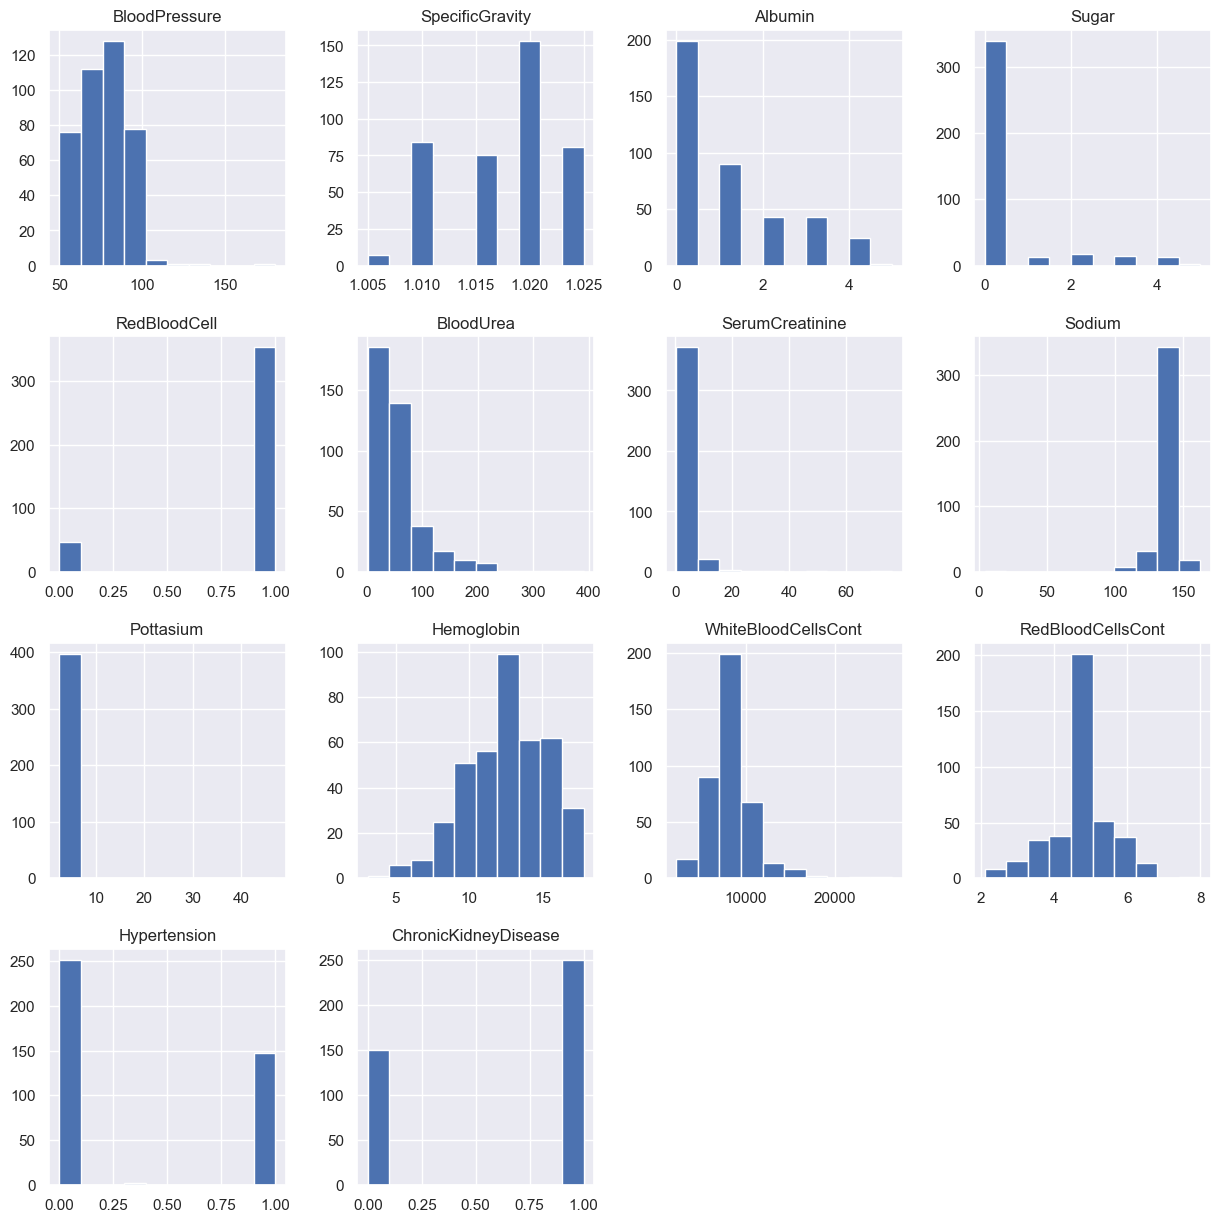

In [6]:
#generating histograms
plot = data.hist(figsize=(15,15))



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

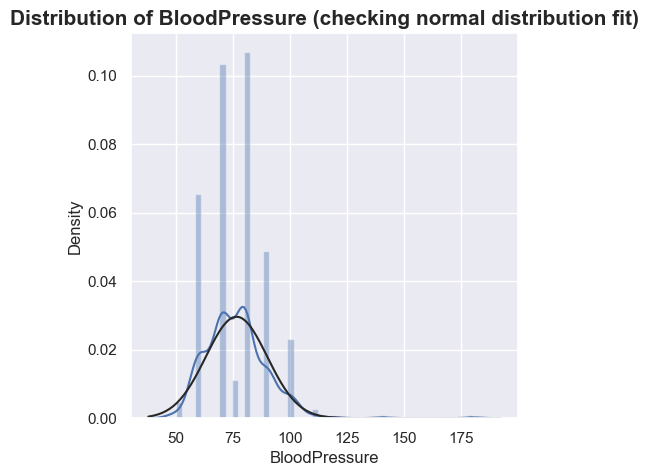

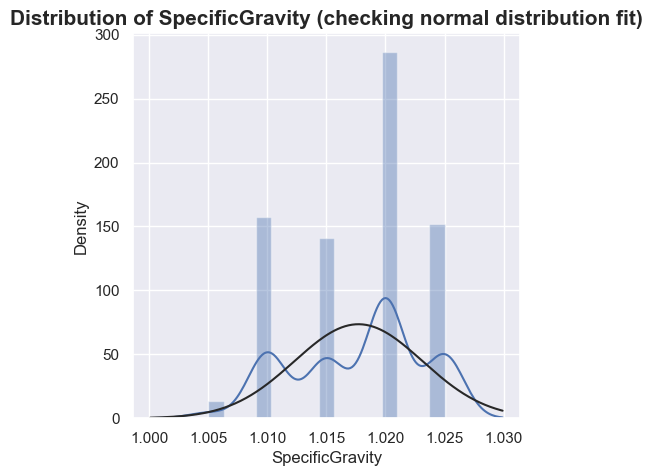

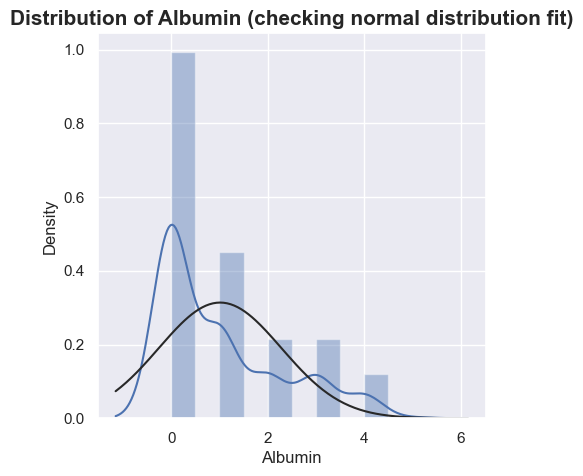

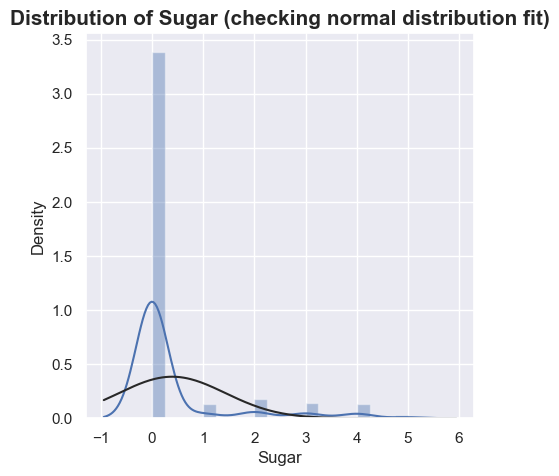

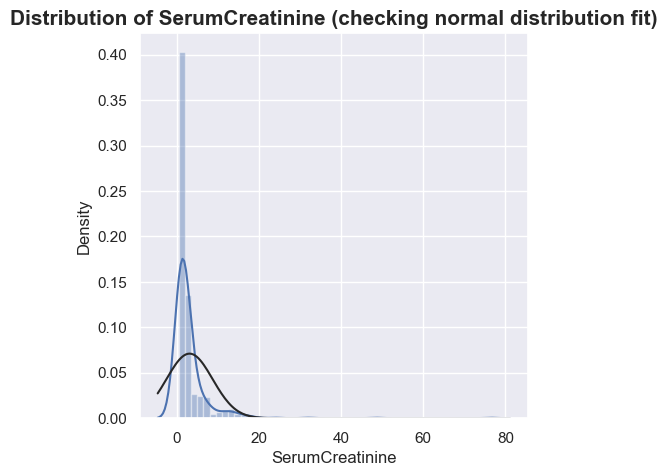

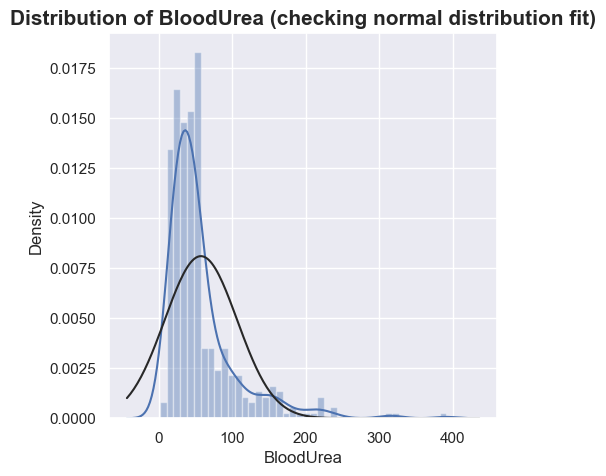

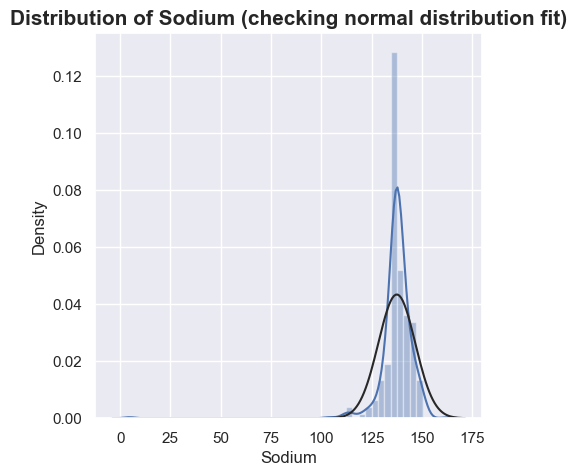

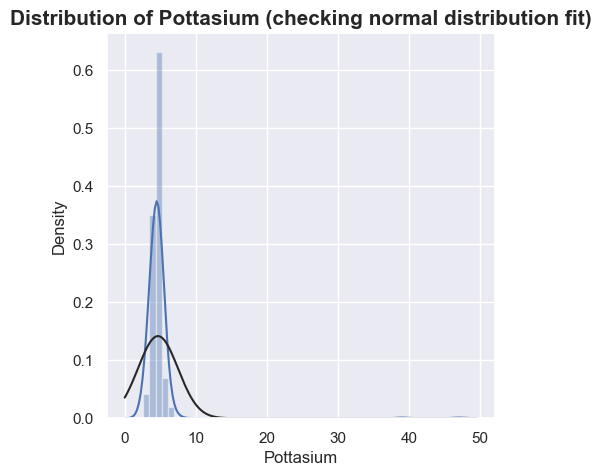

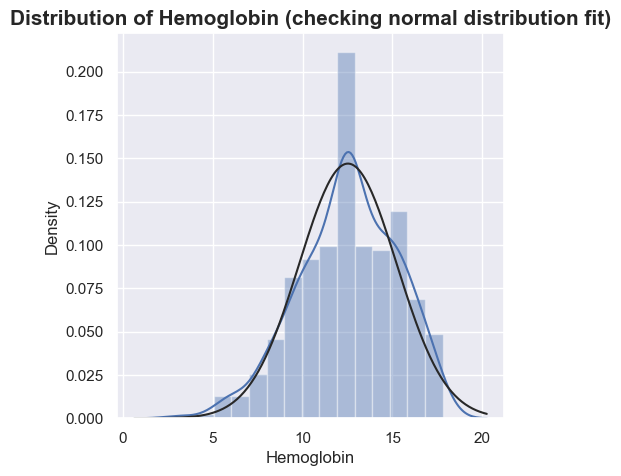

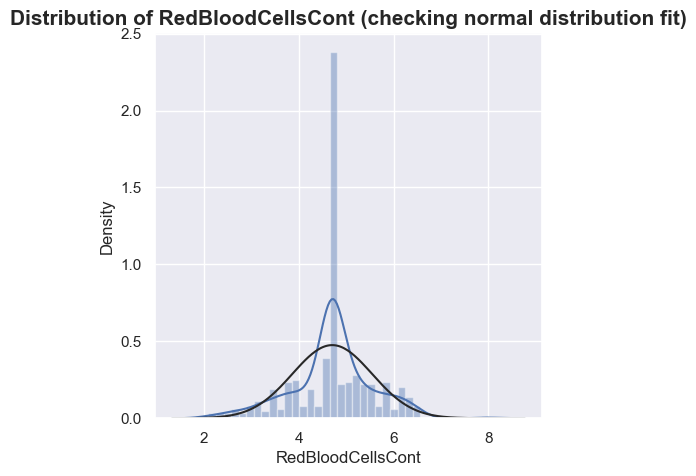

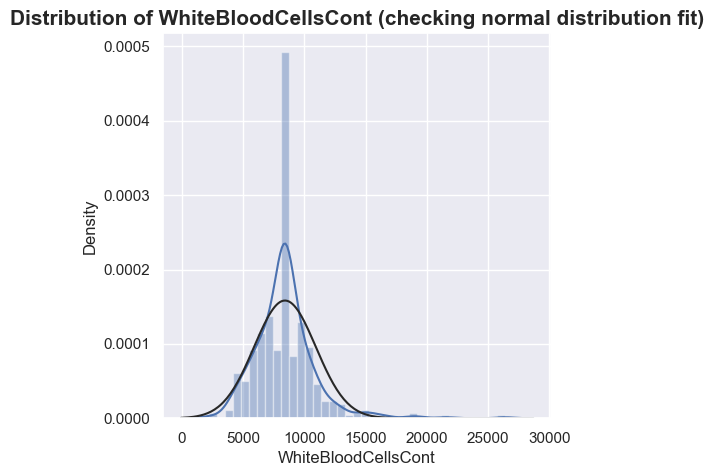

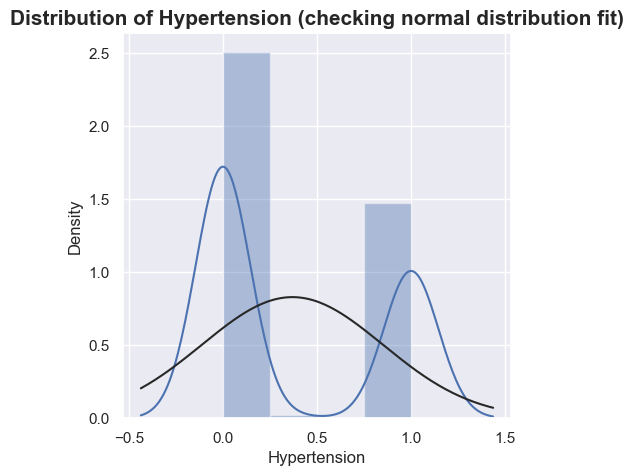

In [7]:
#checking the distribution of independent(predictor) variables
datalist= ['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']
 
for i in datalist:
    from scipy import stats
    plt.figure(figsize= (5,5))
    sns.distplot(data[i], fit = stats.norm)
    plt.title(f"Distribution of {i} (checking normal distribution fit)",size = 15, weight = "bold")



### Observations from graphs:

__BloodPressure__ : nomral distribution

__SpecificGravity__: almost normal distribution with a bit of left-skewness

__Albumin__: almost normal distribution with a bit of right-skewness

__SerumCreatinine__ : almost normal distribution with a bit of left-skewness

__BloodUrea__ : almost normal distribution with a bit of right-skewness

__Sodium__ : nomral distribution with a bit of edge-peak

__Potassium__ : almost normal distribution with a bit of right-skewness

__Hemoglobin__: normal distribution

__WhiteBloodCellConncentration__ : almost normal distribution with a bit of right-skewness

__RedBloodCellConcentration__ : normal distribution


In [8]:
#Dropping dependent valirable from dataframe to obtain the distributions of independent variables
datafinal = data.drop('ChronicKidneyDisease', axis=1)

<AxesSubplot:>

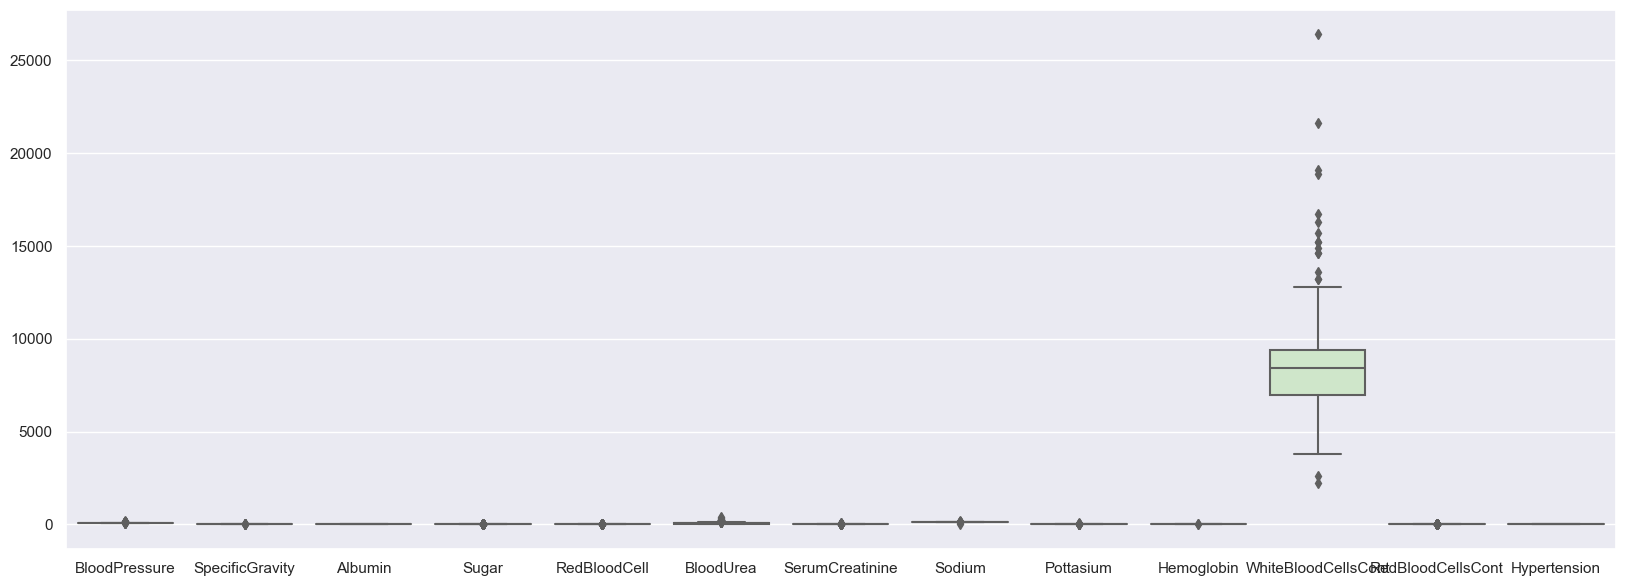

In [9]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=datafinal, palette="Set3")

### Observations:

The range of WhiteBloodCells is way too high and is dominating as compared to other predictor variables.Because of which it is suppressing other valiables Therefore, we are not able to visualize the ranges for other predictor variables. Hence we perform normalisation

So what should be do next to visualize ranges of other predictor variables?

We will plot the charts separately to get the ranges of each one of them

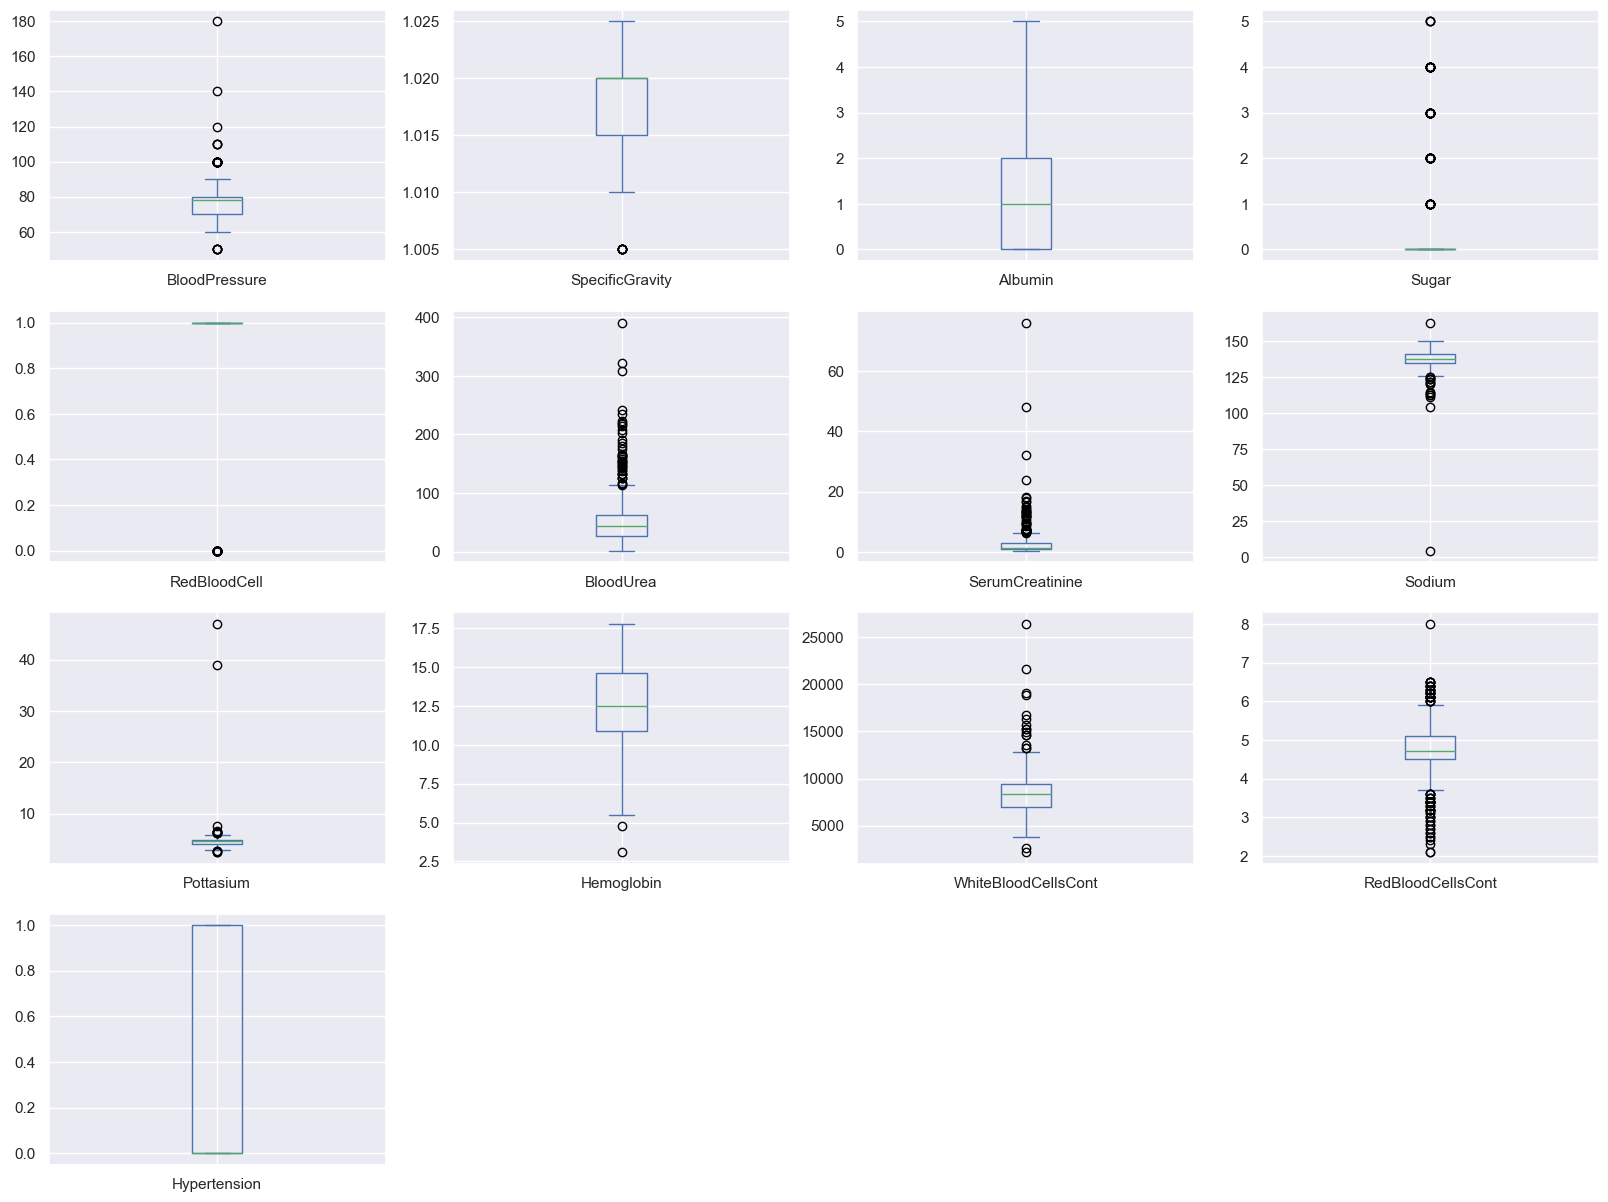

In [10]:
import matplotlib.pyplot as plt

# Create box plots for all numeric variables
datafinal.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

<AxesSubplot:>

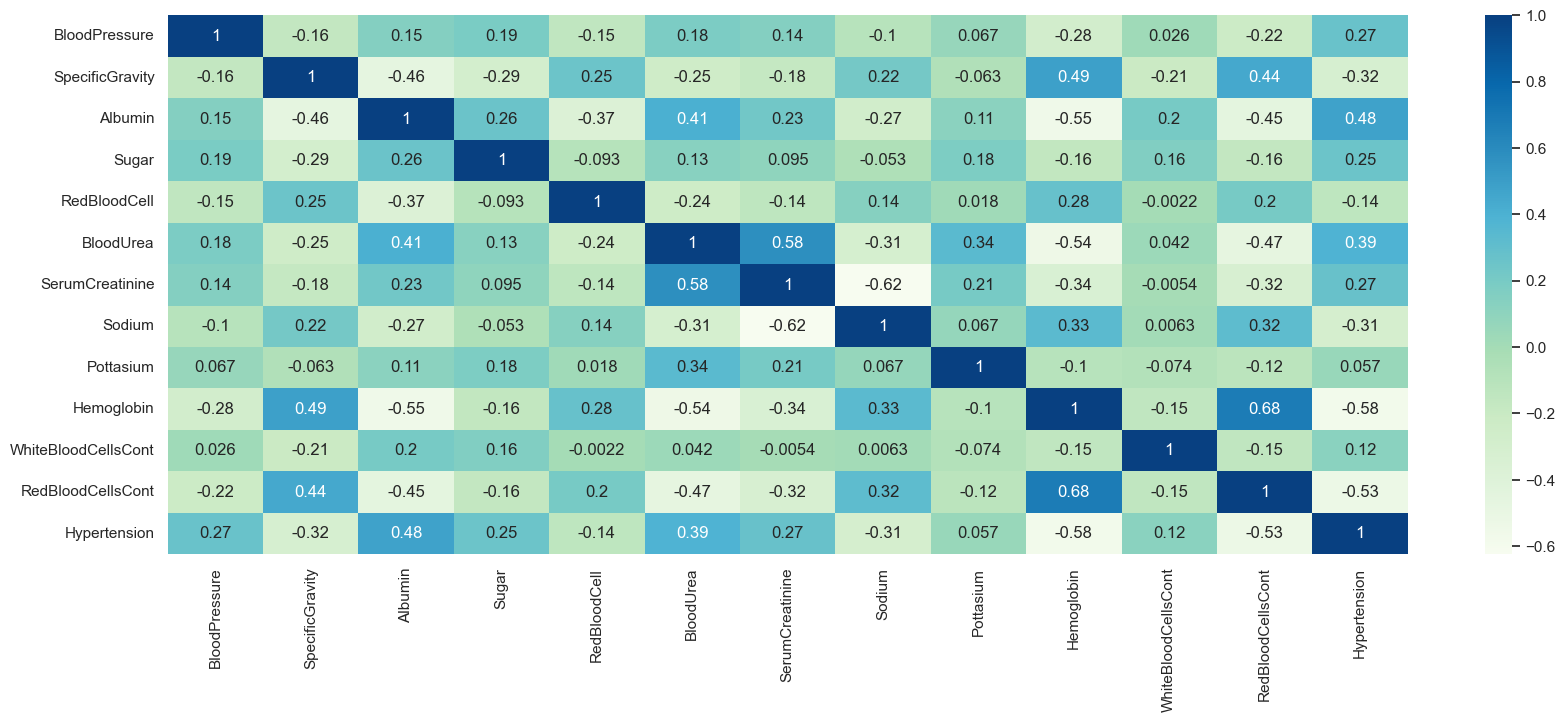

In [11]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(datafinal.corr(), annot=True, cmap='GnBu')

### Observations:
1. From the plots, we do not have much high correlation between features.
2. Red Blood Cell concentration and Hemoglobin are highly coorelated
3. Serum Creatinine and Blood urea has the coorelation value of 0.58

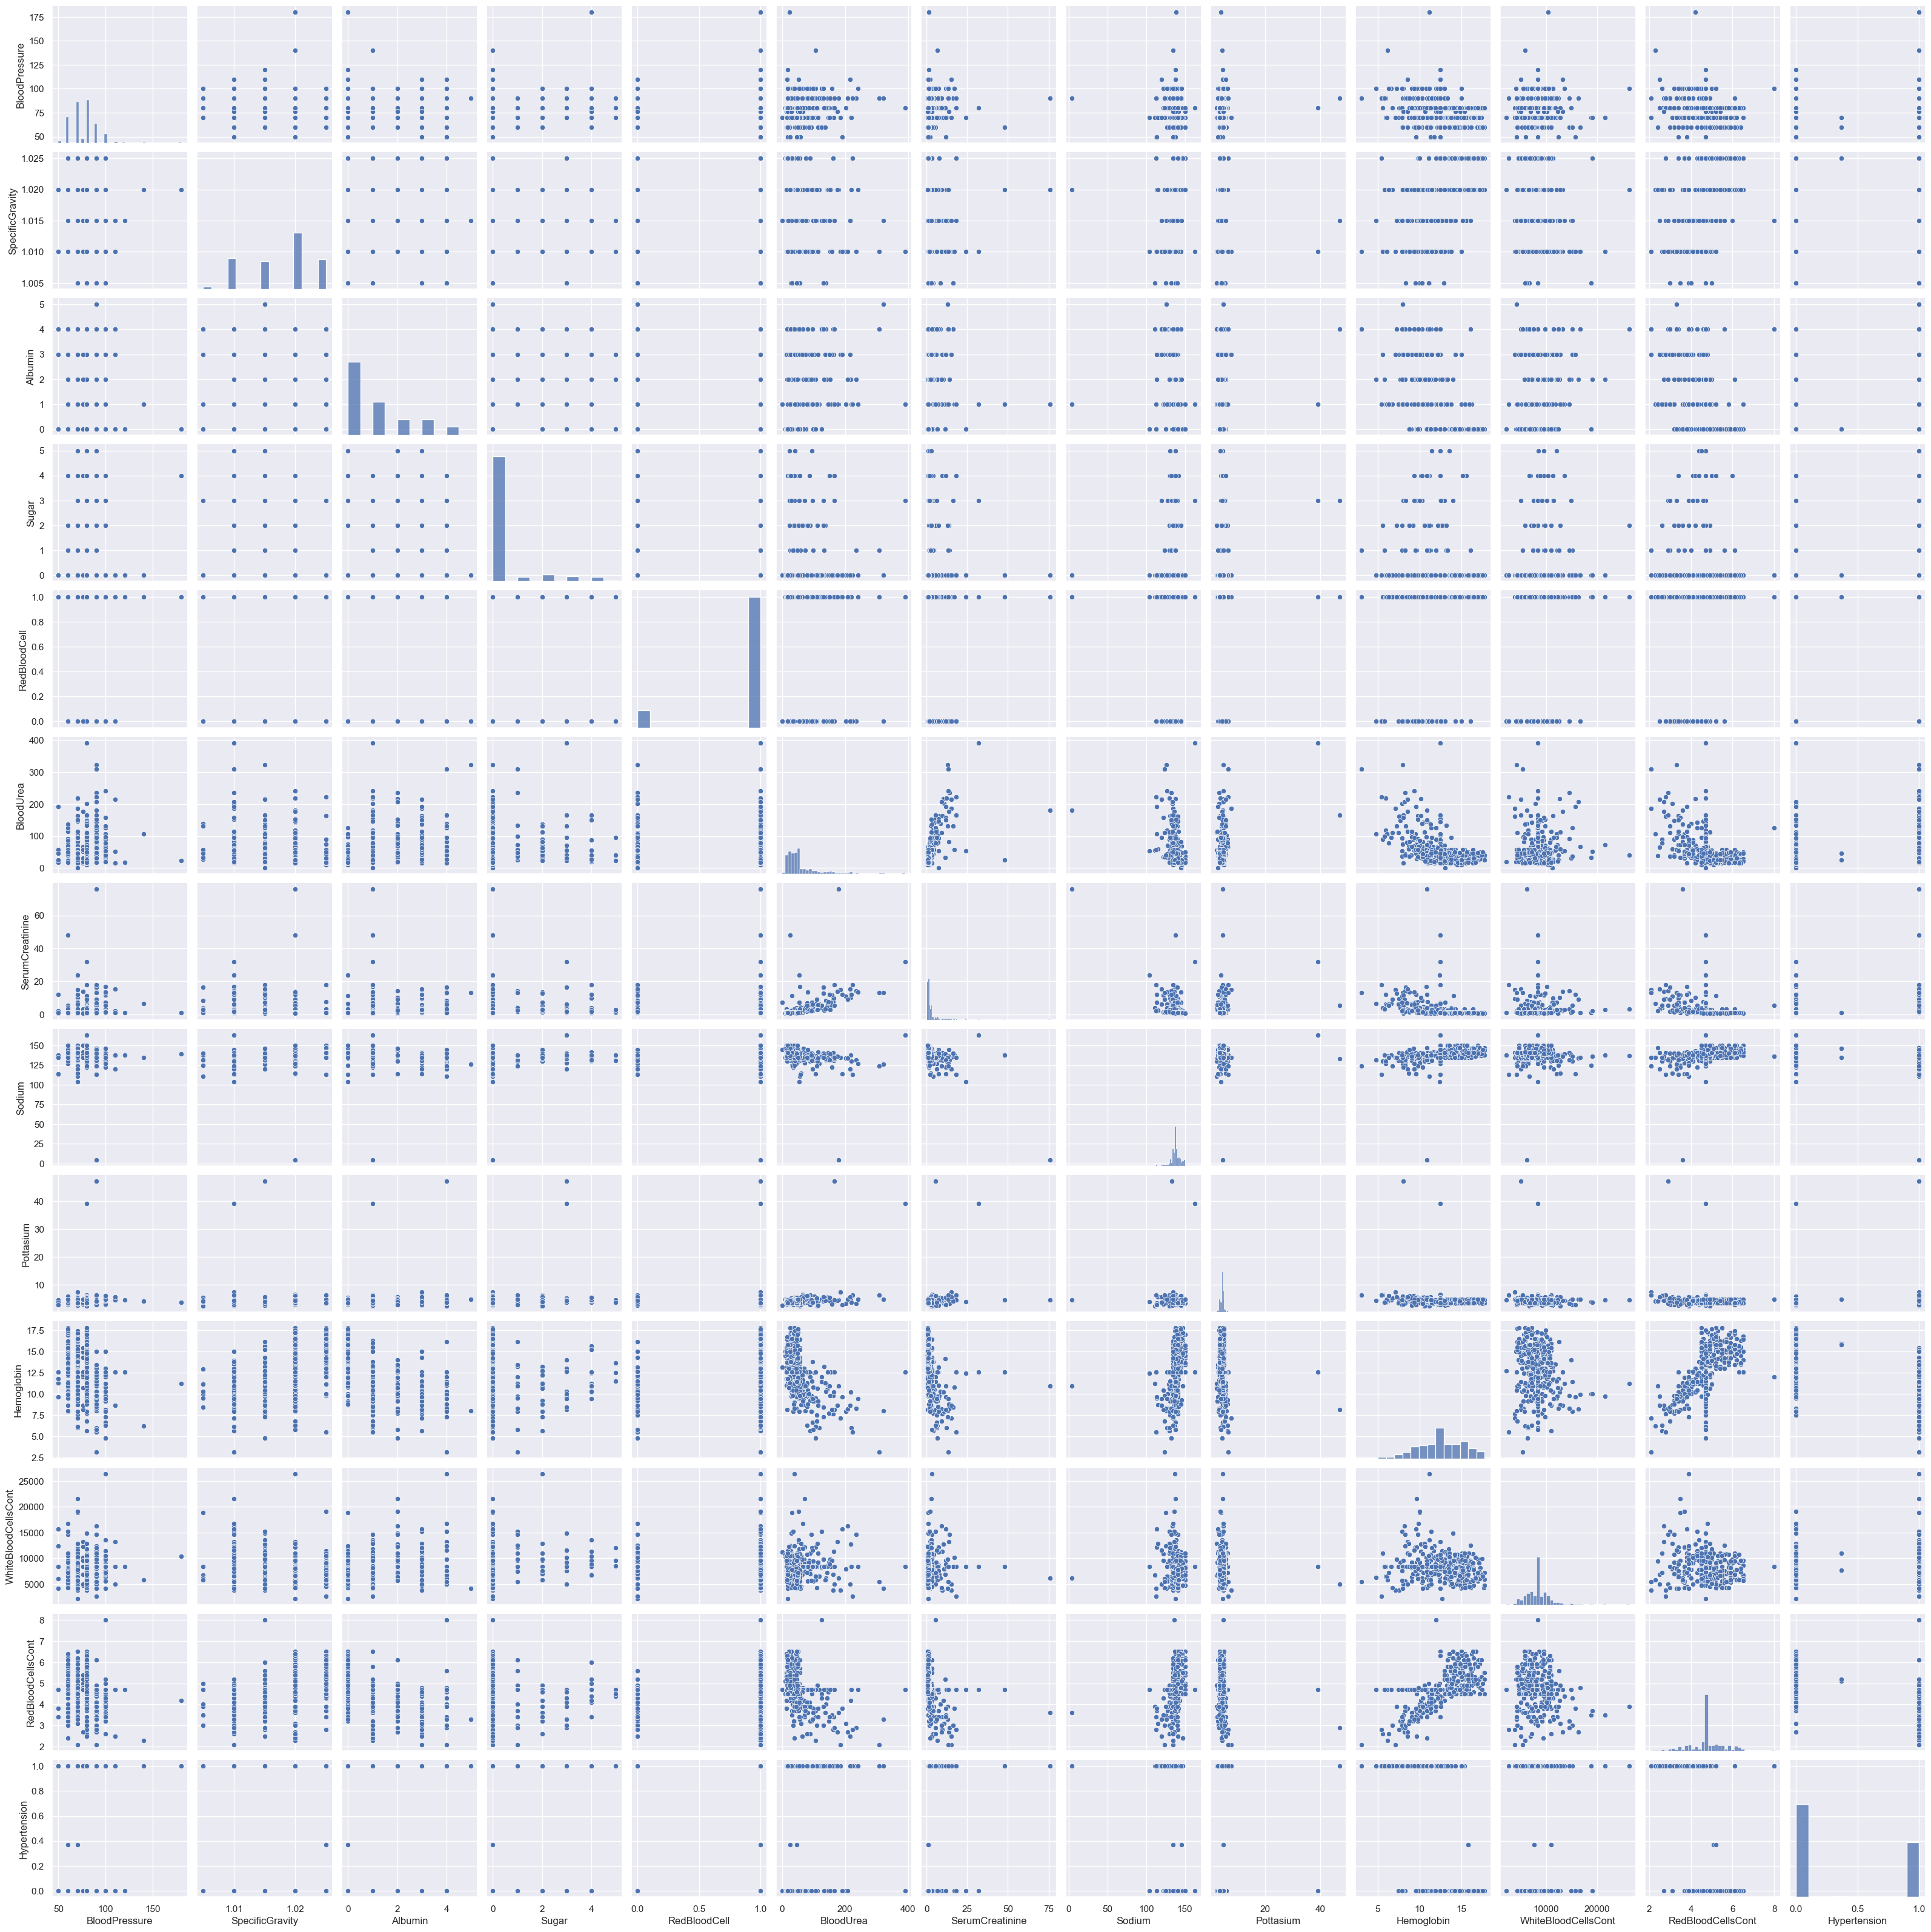

In [12]:
#pair plot to check the colinearity
sns.pairplot(datafinal) 
plt.show()


# What kind of data exploration did you do?
#### First things first
- __Datatype Check__ - All the features in the dataset are Integers/ Float.
- __Missing Data Check__ - Our Dataset didn't had any missing values in any of the features
- __Distribution of training data__ - I checked the probability distribution of each and every feature in the training dataset and recorded observations
- __Correlation Check__ - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that  the didn't had any significant multi colinearity issues.
- __Histogram Plot__ - I have also plotted histograms for each numerical column in the dataframe and analyzed individual feature distribution
- __Barplot__ - Performed Barplot analysis to findout how a variable impacts on prediction of disease

## Data Cleaning
This dataset was relatively cleaner with no missing values. But handing missing values is one of the most important tasks in any Data Science project.I have performed various imputation techniques to acheive the same

### How to handle missing data - Data Imputation techniques
- Adding missing values to the original dataframe by randomly selecting a percentage of rows and columns (1%, 5%, and 10%) and replacing the values in those rows and columns with NaN.
- Performing median and mode imputation of missing values
- KNN Imputation 
- MICE Imputation

Our dataset doesn't have any missing values, lets deliberately create some missing values and have a comparative analysis of how effectively each method impacts on accuracy

We will remove 1%, 5% and 10% of the data from alcohol in our dataset and see how well different imputation techniques recover the data back


In [13]:
percent=[0.01,0.05,0.1]
train_data = data.astype(float)
cols=list(train_data.columns)
all_rows=[]
all_cols=[]
for per in percent:
    nan_rows_size=int(per*len(train_data))
    random_cols=np.random.choice(np.arange(len(cols)),nan_rows_size,replace=True)
    random_rows=np.random.choice(np.arange(len(train_data)),nan_rows_size,replace=False)
    all_rows.append(random_rows)
    all_cols.append(random_cols)
    
#creating new dataframe with 1%,5% and 10% missing values    
predictors_missing_1_percent=train_data.copy()
for r_index,c_index in zip(all_rows[0],all_cols[0]):
    predictors_missing_1_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_5_percent=train_data.copy()
for r_index,c_index in zip(all_rows[1],all_cols[1]):
    predictors_missing_5_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_10_percent=train_data.copy()
for r_index,c_index in zip(all_rows[2],all_cols[2]):
    predictors_missing_10_percent.at[r_index,cols[c_index]]=np.NaN

In [14]:
#Printing missing values
print('Number of missing values')
print('1% missing',predictors_missing_1_percent.isna().sum().sum())
print('5% missing',predictors_missing_5_percent.isna().sum().sum())
print('10% missing',predictors_missing_10_percent.isna().sum().sum())
train_data.head(5)

Number of missing values
1% missing 4
5% missing 20
10% missing 40


BloodPressure  SpecificGravity  Albumin  Sugar  RedBloodCell  BloodUrea  \
0           80.0            1.020      1.0    0.0           1.0       36.0   
1           50.0            1.020      4.0    0.0           1.0       18.0   
2           80.0            1.010      2.0    3.0           1.0       53.0   
3           70.0            1.005      4.0    0.0           1.0       56.0   
4           80.0            1.010      2.0    0.0           1.0       26.0   

   SerumCreatinine  Sodium  Pottasium  Hemoglobin  WhiteBloodCellsCont  \
0              1.2  137.53       4.63        15.4               7800.0   
1              0.8  137.53       4.63        11.3               6000.0   
2              1.8  137.53       4.63         9.6               7500.0   
3              3.8  111.00       2.50        11.2               6700.0   
4              1.4  137.53       4.63        11.6               7300.0   

   RedBloodCellsCont  Hypertension  ChronicKidneyDisease  
0               5.20           1.0                   1.0  
1               4.71           0.0                   1.0  
2               4.71           0.0                   1.0  
3               3.90           1.0                   1.0  
4               4.60           0.0                   1.0

In [15]:
# Dropping NaN value rows from our 1%, 5% and 10% missing values dataframe and creating new dataframes
df_1_percent_without_nan=predictors_missing_1_percent.dropna()
df_5_percent_without_nan=predictors_missing_5_percent.dropna()
df_10_percent_without_nan=predictors_missing_10_percent.dropna()
df_1_percent_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         396 non-null    float64
 1   SpecificGravity       396 non-null    float64
 2   Albumin               396 non-null    float64
 3   Sugar                 396 non-null    float64
 4   RedBloodCell          396 non-null    float64
 5   BloodUrea             396 non-null    float64
 6   SerumCreatinine       396 non-null    float64
 7   Sodium                396 non-null    float64
 8   Pottasium             396 non-null    float64
 9   Hemoglobin            396 non-null    float64
 10  WhiteBloodCellsCont   396 non-null    float64
 11  RedBloodCellsCont     396 non-null    float64
 12  Hypertension          396 non-null    float64
 13  ChronicKidneyDisease  396 non-null    float64
dtypes: float64(14)
memory usage: 46.4 KB


Here we are dropping all the rows from the newly created dataframes with missing values that contain NaN values. It creates new dataframes, called "df_1_percent_without_nan", "df_5_percent_without_nan", and "df_10_percent_without_nan", which do not contain any rows with NaN values. These dataframes are created by using the "dropna()" function on the dataframes "predictors_missing_1_percent", "predictors_missing_5_percent", and "predictors_missing_10_percent", respectively.

Here we are creating new dataframes with the same data as the original dataframe, but with 1%, 5% and 10% of the data points replaced with NaN values. The original dataframe is copied using the copy() method, and then values are set to NaN using the at method of the dataframe.

Then, it is creating new dataframe with dropped na values from the above created dataframe with missing values. For example, df_1_percent_without_nan is created by dropping the NaN values from the predictors_missing_1_percent dataframe. The info() method is then used to display information about the dataframe, such as the number of non-null values in each column.

In [16]:
# Importing the metrics library from sklearn
from sklearn import metrics as sm

# Defining the function to calculate model performance scores
def performnce_calcuation(y_true,y_pred):
    acc=sm.accuracy_score(y_true,y_pred)
    log_loss=sm.log_loss(y_true,y_pred)
    auc=sm.roc_auc_score(y_true,y_pred)
    confusion_matrix=sm.confusion_matrix(y_true,y_pred)
    return acc,auc,log_loss,confusion_matrix

In [17]:
num_cols=['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']

cat_cols=['ChronicKidneyDisease']

predict_impute_1=pd.DataFrame()
predict_impute_5=pd.DataFrame()
predict_impute_10=pd.DataFrame()
for col in num_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())
for col in cat_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_1_percent[col].mode())

# Imputation Method 1 : Impute Numerical values with Median and Categorical value with Mode

In [18]:
from sklearn import tree
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [19]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.95
AUC: 0.95
Log Loss: 1.74
Confusion Matrix:
 [[36  1]
 [ 4 58]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.96
AUC: 0.95
Log Loss: 1.45
Confusion Matrix:
 [[32  2]
 [ 2 59]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.97
AUC: 0.95
Log Loss: 1.15
Confusion Matrix:
 [[28  3]
 [ 0 59]]

-------------------------------


# Imputation Method 2 : Impute using KNN imputer

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [21]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=2)
predict_impute_1 = predict_impute_1.dropna()
predict_impute_5 = predict_impute_5.dropna()
predict_impute_10 = predict_impute_10.dropna()

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_1['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_5['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_10['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [22]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.99
AUC: 0.99
Log Loss: 0.35
Confusion Matrix:
 [[35  0]
 [ 1 64]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.95
AUC: 0.94
Log Loss: 1.73
Confusion Matrix:
 [[32  3]
 [ 2 63]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.98
AUC: 0.98
Log Loss: 0.70
Confusion Matrix:
 [[35  0]
 [ 2 62]]

-------------------------------


#  Imputation Method 3 : MICE Imputation technique

In [23]:
!pip install fancyimpute
#from sklearn.impute import IterativeImputer
from fancyimpute import IterativeImputer as MICE
import pandas as pd


# create a copy of the original dataframe with missing values
df_missing = predictors
df_missing.iloc[2:5,3:6] = np.nan

# create an imputer object
imputer = MICE()

# fit the imputer on the data
imputer.fit(predictors)

#MICE().fit_transform(df)


# perform the imputation
df_imputed = imputer.transform(predictors)

predictors=predict_impute_1.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('ChronicKidneyDisease',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [24]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('ChronicKidneyDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['ChronicKidneyDisease'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [25]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")


-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.95
AUC: 0.95
Log Loss: 1.74
Confusion Matrix:
 [[36  1]
 [ 4 58]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.96
AUC: 0.95
Log Loss: 1.45
Confusion Matrix:
 [[32  2]
 [ 2 59]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.97
AUC: 0.95
Log Loss: 1.15
Confusion Matrix:
 [[28  3]
 [ 0 59]]

-------------------------------


# Interpreting the Imputation Methods

Here are some conclusions that can be drawn from the the aboveresults:

- __Median and mode imputation:__ The accuracy initially decreases from 1% to 5% imputation, but then increases after more data imputation ie at 10%. This suggests that median and mode imputation may not be effective in handling missing values, as the drop in accuracy indicates loss of valuable information. However, with more imputation, the accuracy starts to recover, indicating that the imputed values may be getting closer to the true values as more data is imputed.

- __KNN imputation:__ The accuracy decreased  after 1% imputation, but then increases from 5% to 10% imputation. This suggests that KNN imputation may not be effective in improving model accuracy, as the imputed values may not be accurate enough to reflect the true underlying patterns in the data.

- __MICE (Multivariate Imputation by Chained Equations) technique:__ The accuracy initially decreases after 1% imputation, but then shows a significant increase after 10% imputation. This suggests that MICE technique may be more effective compared to median, mode, or KNN imputation, as it results in improved accuracy with more imputed data.

- However, the accuracy for all imputation techniques is less than the base model's accuracy. This suggests that imputation of missing values may not fully compensate for the loss of information due to missing data, and the imputed values may not accurately reflect the true underlying patterns in the data.

In conclusion, the choice of imputation technique and the amount of imputed data can significantly impact model accuracy.




# Feature Importance and Selection

- Lets fit a very simple linear model to understand how the predictor variable are impactimng in prediction of Kidney Disease


### Normalization

In [26]:
from sklearn import preprocessing

# Create x to store scaled values as floats
x = datafinal[['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
datafinal[['BloodPressure','SpecificGravity','Albumin','Sugar','SerumCreatinine','BloodUrea','Sodium','Pottasium','Hemoglobin','RedBloodCellsCont','WhiteBloodCellsCont','Hypertension']] = pd.DataFrame(x_scaled)

In [27]:
#data after noromalizing and feature creation
datafinal.describe()

BloodPressure  SpecificGravity     Albumin       Sugar  RedBloodCell  \
count     400.000000       400.000000  400.000000  400.000000    400.000000   
mean        0.203500         0.635625    0.203000    0.079000      0.882500   
std         0.103666         0.271701    0.254466    0.208008      0.322418   
min         0.000000         0.000000    0.000000    0.000000      0.000000   
25%         0.153846         0.500000    0.000000    0.000000      1.000000   
50%         0.215385         0.750000    0.200000    0.000000      1.000000   
75%         0.230769         0.750000    0.400000    0.000000      1.000000   
max         1.000000         1.000000    1.000000    1.000000      1.000000   

        BloodUrea  SerumCreatinine      Sodium   Pottasium  Hemoglobin  \
count  400.000000       400.000000  400.000000  400.000000  400.000000   
mean     0.143531         0.035349    0.839300    0.047817    0.641286   
std      0.126537         0.074305    0.058071    0.063366    0.184774   
min      0.000000         0.000000    0.000000    0.000000    0.000000   
25%      0.065469         0.006614    0.823344    0.033708    0.528912   
50%      0.109114         0.013228    0.839306    0.047865    0.641497   
75%      0.154685         0.035317    0.861199    0.051685    0.784014   
max      1.000000         1.000000    1.000000    1.000000    1.000000   

       WhiteBloodCellsCont  RedBloodCellsCont  Hypertension  
count           400.000000         400.000000    400.000000  
mean              0.256450           0.442081      0.369350  
std               0.104265           0.142426      0.482023  
min               0.000000           0.000000      0.000000  
25%               0.197314           0.406780      0.000000  
50%               0.256446           0.442373      0.000000  
75%               0.297521           0.508475      1.000000  
max               1.000000           1.000000      1.000000

# Observations:

We can see that the numerical variables - BloodPressure,Albumin,BloodUrea,Sodium,Potassium,Hemoglobin,WhiteBloodCellsCont,RedBloodCellsCont are now in the range of 0 to 1

<AxesSubplot:>

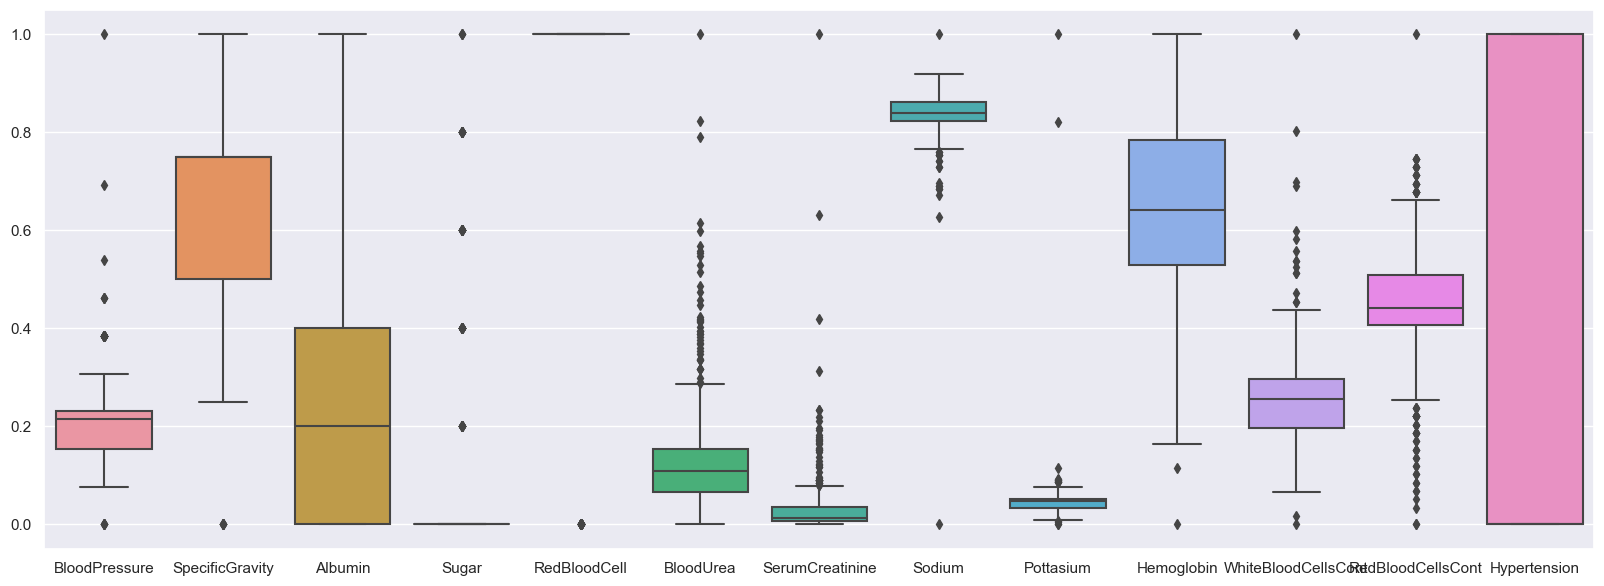

In [28]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=datafinal)

# Observations:
Now it is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:

1.Blood Pressure,BloodUrea,Serum Creatanine,Sodium,Potassium,WBCCont,RBCCont has outliers which means that their concentration level in body do not impact much in identifying the chronic kidney disease.

2.Sugar levels indicate errors or unusual observations.

In [29]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = data.drop(["ChronicKidneyDisease"], axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, data.ChronicKidneyDisease), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [30]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "ChronicKidneyDisease ~ BloodPressure+SpecificGravity+Albumin+RedBloodCell+Sugar+SerumCreatinine+BloodUrea+Sodium+Pottasium+Hemoglobin+RedBloodCellsCont+WhiteBloodCellsCont+Hypertension",

    data=df_norm,
).fit()
print(results.summary())  

                             OLS Regression Results                             
Dep. Variable:     ChronicKidneyDisease   R-squared:                       0.713
Model:                              OLS   Adj. R-squared:                  0.704
Method:                   Least Squares   F-statistic:                     73.85
Date:                  Sun, 09 Apr 2023   Prob (F-statistic):           4.50e-96
Time:                          20:23:10   Log-Likelihood:                -27.596
No. Observations:                   400   AIC:                             83.19
Df Residuals:                       386   BIC:                             139.1
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

We will consider a significance value of 0.05 for determining the significance of our predictor variables which means if

p value is greater that 0.05 - feature is not significant for predicting the target variable
p value is less than 0.05 - feature is significant for predicting the target variable

### Observations:

1. __Blood Pressure__ has a p-value of 0.040 which is lesser than 0.05 so it is a significant feature
2. __Specific Gravity__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
3. __Albumin__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
4. __RedBloodCell__ has a p-value of 0.629 which is greater than 0.05 so it is not a significant feature
5. __Sugar__ has a p-value of 0.121 which is greater than 0.05 so it is not a significant feature
6. __Serum Creatinine__has a p-value of 0.390 which is greater than 0.05 so it is not significant feature
7. __Blood Urea__ has a p-value of 0.008 which is lesser than 0.05 so it is a significant feature
8. __Sodium__ has a p-value of 0.196 which is greater than 0.05 so it is a not significant feature
9. __Pottasium__ has a p-value  of 0.711 which is greater than 0.05 so it is not a significant feature
10. __Hemoglobin__ has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
11. __RedBloodCellsCont__ has a p-value 0.312 which is greater than 0.05 so it is not a significant feature
12. __WhiteBloodCellsCont__ has a p-value 0.397 which is greater than 0.05 so it is not a significant feature
13. __Hypertension__ has a p-value 0.0  which is lesser than 0.05 so it is a significant feature

Lets consider only these features and calculate the model fit again, and then lets have a comparative analysis of both models.

In [31]:
df_norm_feature_selected = df_norm[
    [
        "BloodPressure",
        "SpecificGravity",
        "Albumin",
        "BloodUrea",
        "Hemoglobin",
        "Hypertension",
        "ChronicKidneyDisease",
    ]
]

In [32]:
results2 = smf.ols(
    "ChronicKidneyDisease ~ BloodPressure+SpecificGravity+Albumin+BloodUrea+Hemoglobin+Hypertension",
    data=df_norm_feature_selected,
).fit()
print(results2.summary())  # OLS Linear Model Summary

                             OLS Regression Results                             
Dep. Variable:     ChronicKidneyDisease   R-squared:                       0.705
Model:                              OLS   Adj. R-squared:                  0.701
Method:                   Least Squares   F-statistic:                     156.8
Date:                  Sun, 09 Apr 2023   Prob (F-statistic):          4.91e-101
Time:                          20:23:10   Log-Likelihood:                -32.972
No. Observations:                   400   AIC:                             79.94
Df Residuals:                       393   BIC:                             107.9
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.

In [33]:
predicted_disease_1 = results.predict(
    df_norm[
        [
            "BloodPressure","SpecificGravity","Albumin","RedBloodCell","Sugar","SerumCreatinine","BloodUrea","Sodium","Pottasium","Hemoglobin","RedBloodCellsCont","WhiteBloodCellsCont","Hypertension"
        ]
    ]
)
df_norm["predicted_disease_1"] = predicted_disease_1.round()

In [34]:
predicted_disease_2 = results2.predict(
    df_norm_feature_selected[
        [
         "BloodPressure",
        "SpecificGravity",
        "Albumin",
        "BloodUrea",
        "Hemoglobin",
        "Hypertension"
        ]
    ]
)
df_norm_feature_selected["predicted_disease_2"] = predicted_disease_2.round()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [36]:
print(
    "Accuracy of predicting Chronic Kidney Disease using all features = ",
    100 - percentage_change(df_norm["ChronicKidneyDisease"], df_norm["predicted_disease_1"]),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using only significant features is = ",
    100
    - percentage_change(
        df_norm_feature_selected["ChronicKidneyDisease"],
        df_norm_feature_selected["predicted_disease_2"],
    ),
)

Accuracy of predicting Chronic Kidney Disease using all features =  95.000000005
Accuracy of predicting Chronic Kidney Disease using only significant features is =  95.000000005


## Observations:
From the above two summaries we can interpret that after selecting only the significant features(features with P value less than 0.05) it had little to no effect on the outcome compare to the model which uses all the features.

From the above two interpretations, our observation is that in both the cases our model predicts the chances of person affecting with Kidney Disease very good and they are same to each other i.e __95.00000005%__
-_
From the above studies let's stick to the data with all featues and try using different models

In [37]:
df_norm = df_norm.drop(["predicted_disease_1"], axis=1)

In [38]:
X = df_norm.drop(["ChronicKidneyDisease"], axis=1)  # Training Feature
Y = df_norm["ChronicKidneyDisease"]  # Target

# How did you split the data into train, and test?
- Here I have split the data into training and test data in the ratio of 9:1 respectively

In [39]:
 # Splitting Data into Training and Test
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split( 
    X, Y, test_size=0.1, random_state=42
)
  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_train_100 = shap.utils.sample(
    x_train, 100
)
# Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  

# Fitting Linear Model

In [40]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [41]:
y_linear_predictions = linear_model.predict(x_test).round()

# Fitting Tree Based Model

In [42]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=13, n_estimators=10, random_state=0)

In [43]:
y_tree_based_predictions = tree_model.predict(x_test).round()

# Fitting a Support Vector Machine (SVM)

In [44]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [45]:
svm_predictions = svm_model.predict(x_test).round()

# Using AutoML to find out the best Model

In [46]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222


In [47]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

1


In [48]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:15987 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-11.0.17+8 (build 11.0.17+8, mixed mode)
  Starting server from C:\Users\Dell\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Dell\AppData\Local\Temp\tmpwilaxrjv
  JVM stdout: C:\Users\Dell\AppData\Local\Temp\tmpwilaxrjv\h2o_Dell_started_from_python.out
  JVM stderr: C:\Users\Dell\AppData\Local\Temp\tmpwilaxrjv\h2o_Dell_started_from_python.err
  Server is running at http://127.0.0.1:15987
Connecting to H2O server at http://127.0.0.1:15987 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.4
H2O_cluster_version_age:    3 months and 4 days
H2O_cluster_name:           H2O_from_python_Dell_tvzkz3
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.977 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:15987
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.13 final
--------------------------  -----------------------------

In [49]:
# Converting Pandas dataframe in H2O dataframe
df = h2o.H2OFrame(
    data
) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [50]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [51]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "ChronicKidneyDisease"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [52]:
 # Training AutoML
autoML = autoML(df_train, df_test) 


AutoML progress: |
20:23:39.119: AutoML: XGBoost is not available; skipping it.
20:23:39.212: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:23:39.943: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
20:23:41.240: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
20:23:41.398: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical befo

In [53]:
 # Leaderbord of AutoML output
autoML[2].leaderboard 

model_id                                                      rmse         mse         mae      rmsle    mean_residual_deviance
-------------------------------------------------------  ---------  ----------  ----------  ---------  ------------------------
StackedEnsemble_BestOfFamily_5_AutoML_1_20230409_202339  0.0563753  0.00317817  0.00558929  0.0391179                0.00317817
GBM_grid_1_AutoML_1_20230409_202339_model_17             0.0879244  0.0077307   0.0364444   0.0607553                0.0077307
StackedEnsemble_BestOfFamily_4_AutoML_1_20230409_202339  0.0897834  0.00806106  0.0426484   0.0625636                0.00806106
StackedEnsemble_AllModels_5_AutoML_1_20230409_202339     0.0917197  0.0084125   0.0373873   0.0649957                0.0084125
GBM_grid_1_AutoML_1_20230409_202339_model_300            0.0935767  0.00875659  0.0379161   0.0633308                0.00875659
GBM_grid_1_AutoML_1_20230409_202339_model_293            0.0952991  0.00908191  0.0333339   0.0637352                0.00908191
GBM_grid_1_AutoML_1_20230409_202339_model_301            0.0975369  0.00951344  0.0463851   0.0680922                0.00951344
GBM_grid_1_AutoML_1_20230409_202339_model_174            0.0979794  0.00959996  0.0456079   0.0666238                0.00959996
GBM_grid_1_AutoML_1_20230409_202339_model_231            0.0986932  0.00974035  0.039174    0.0679702                0.00974035
GBM_grid_1_AutoML_1_20230409_202339_model_89             0.0988996  0.00978113  0.0392848   0.0674532                0.00978113
[346 rows x 6 columns]

# Evaluation:
After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.

In [54]:
# Printing Best Model
autoML_model = getBestModel(autoML[2])  

65


In [55]:
autoML_best_predictions = autoML_model.predict(df_test).round()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [56]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["ChronicKidneyDisease"], use_pandas=False)

In [57]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [58]:

autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

# Hyperparameter Tuning of AutoML's Best Model

The goal of __hyperparameter tuning__ is to find the hyperparameters that produce the best performance on the test set, while avoiding overfitting on the training set. It is an important step in the machine learning pipeline, as the choice of hyperparameters can have a significant impact on the accuracy and generalization of a machine learning model.

In [59]:
#train test and split
train, validate, test = np.split(
    data.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)
# The values of these keys are lists that contain different values for each hyperparameter that can be used to train 
drf_hyper_params = {
    
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0]
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

#  creating the H2OGridSearch object
gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="ChronicKidneyDisease",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)

#finding best model
def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_model = find_best_model_from_grid(gbm_grid2, "r2")

Parse progress: |

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_1
Best R2: 0.9594463312986752


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


# What evaluation metric are you using?

The evaluation metrics which I am using here are

Mean Squared Error
Root Mean Squared Error
Mean Absolute Error
Mean Residual Deviance
Accuracy

- These evaluation metrics are used to evaluate the best model

- The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

- Accuracy tells us how correct and precise our model is.

### How do training, validation, and test metrics compare?
The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Validation Dataset.

As the Mean Residual Deviance of this model on training and validation dataset is ~0.0094179 and ~0.01416 respectively. Also, the other metrics on both of the dataset validates that the model is not overfitting the Training Data. Please refer below to see the Evaluation Metrics on both training and validation dataset.

In [60]:

#printing the best model

print(best_model)

Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: gbm_grid2_model_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 75                          11498                  2            10           4.50667       3             14            7.54667

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.009417463065085433
RMSE: 0.09704361424166678
MAE: 0.03489710533046072
RMSLE: 0.06777146695567307
Mean Residual Deviance: 0.009417463065085433

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.014162709600570728
RMSE: 0.11900718297888883
MAE: 0.04799219822883606
RMSLE: 0.09186360453357535
Mean Residual Deviance: 0.014162709600570728

Sc

In [61]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["ChronicKidneyDisease"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [62]:
print(
    "Accuracy of predicting Chronic Kidney Disease using Linear Model = ",
    100 - percentage_change(y_test, y_linear_predictions),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using Tree Based Model = ",
    100 - percentage_change(y_test, y_tree_based_predictions),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using SVM = ",
    100 - percentage_change(y_test, svm_predictions),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using best AutoML model = ",
    100 - percentage_change(y_test_h2O, autoMLpredictions),
)
print(
    "Accuracy of predicting Chronic Kidney Disease using best AutoML model with Tuned Hyper-Parameters = ",
    100 - percentage_change(y_test_h2O_2, autoMLpredictions_2),
)

Accuracy of predicting Chronic Kidney Disease using Linear Model =  95.000000005
Accuracy of predicting Chronic Kidney Disease using Tree Based Model =  97.5000000025
Accuracy of predicting Chronic Kidney Disease using SVM =  97.5000000025
Accuracy of predicting Chronic Kidney Disease using best AutoML model =  98.83720930348838
Accuracy of predicting Chronic Kidney Disease using best AutoML model with Tuned Hyper-Parameters =  100.0


# Which models did you explore and did you try to tune the hyperparameters of the best model you got?

I trained multiple models for this purpose including the simplest Linear Regression to using AutoML to get the best model it could fit. The models I trained for this purpose were

- Linear Regressor
- Tree based Model(Random Model Regressor)
- Support Vector Machine(SVM) Regressor
- AutoML
The models which gave me the best performance in predicting the chronic Kidney Disease were the SVM,Tree based model and the model from AutoML. The model from AutoML to give the best result was a RandomForestRegressor.

As the AutoML's model was promising, I tuned its hyperparameters to oprimize the model. Tunining the hyperparameters helped the model to incease its accuracy from __98.795 % to 100 %__ which is a great increase in the performance by acheiving __100% accuracy__ of model

# Model Selection
#### From the above summary of the models trained on the dataset, the two best models are SVM,Tree based Model and AutoML's best model with tuned hyperparameters.

- __SVM Regressor with an Accuracy of ~ 97.50%__
- __AutoML's Hyperparameter Tuned Version ~ 100%__

Let's try to understand how both the models have been trained.

In [63]:
svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

Permutation explainer: 101it [00:56,  1.57it/s]                                                                        


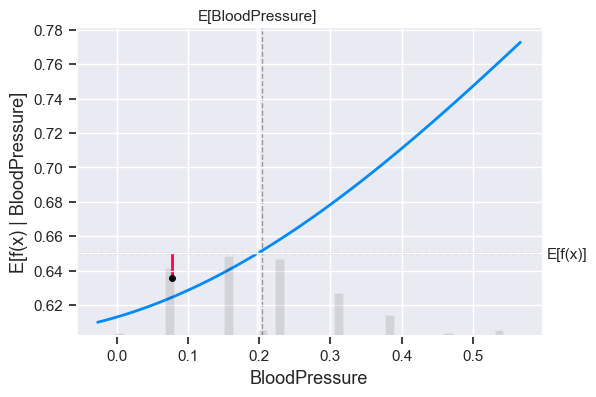

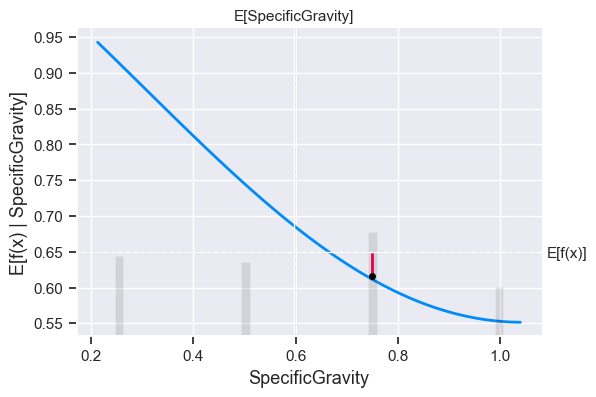

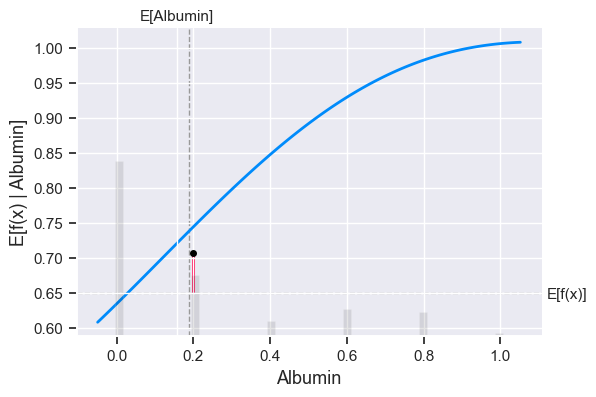

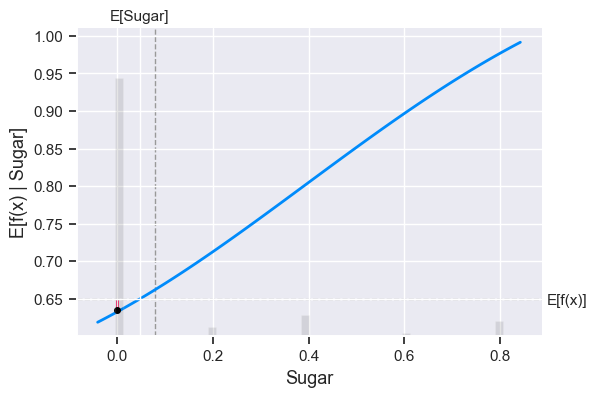

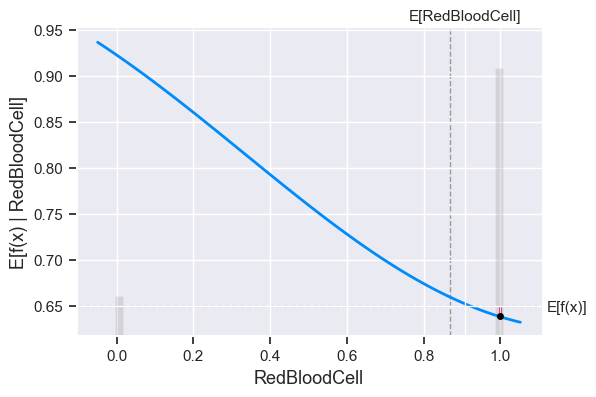

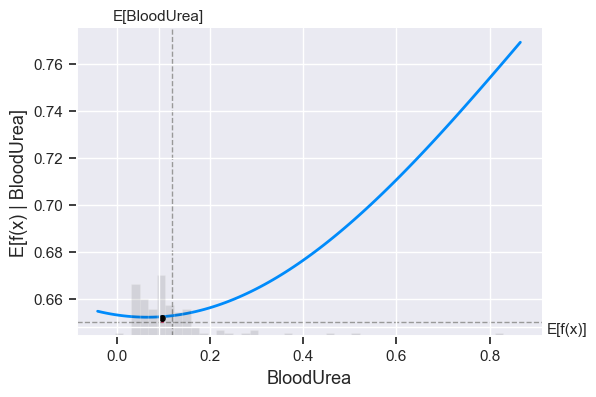

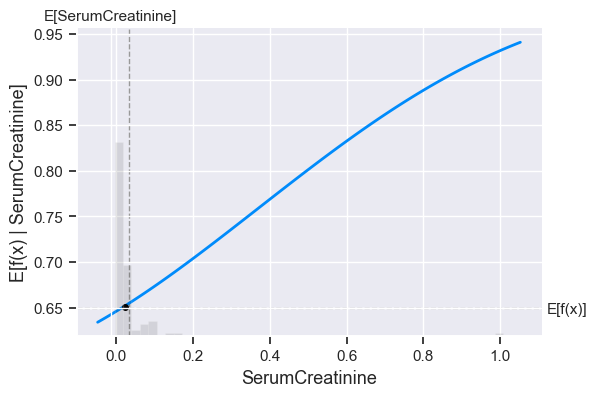

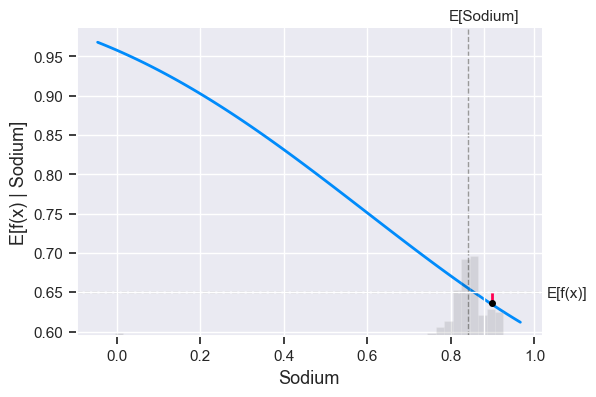

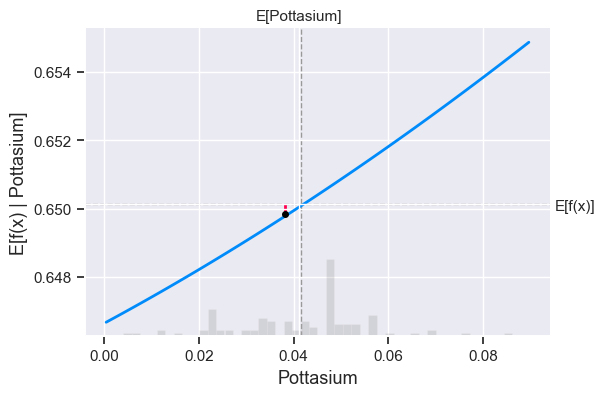

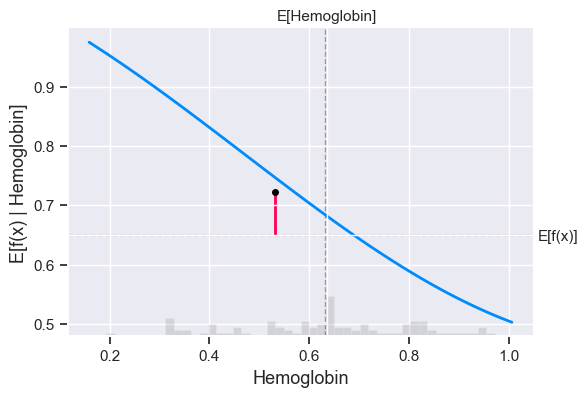

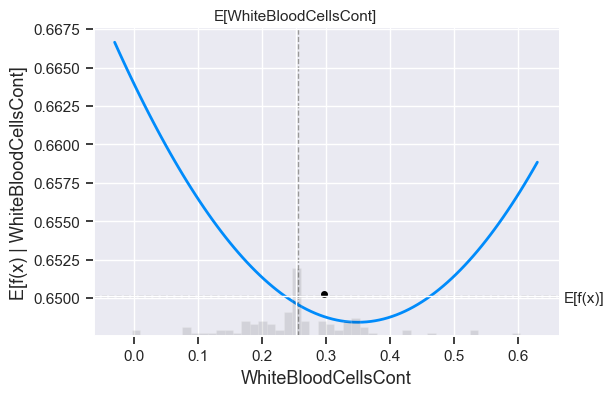

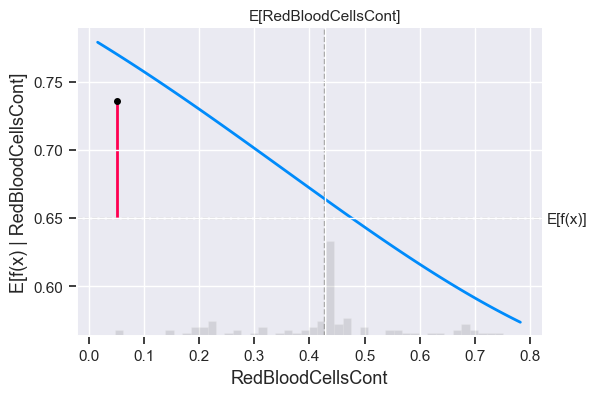

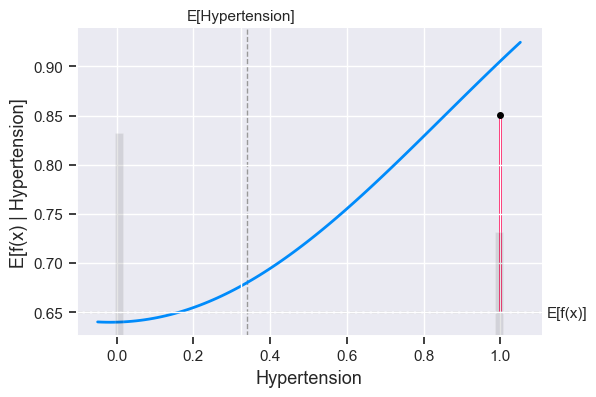

In [64]:
# make a standard partial dependence plot

for i in x_train_100.columns:
    
    sample_ind = 31
    fig, ax = plt.subplots(figsize=(6, 4))  # set figure size
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
        ax=ax,  # specify the axis to use for the plot
    )
    plt.show()
    
 


# Interpreting SVM Regressor using SHAP values


1. This code generates a partial dependence plot for each feature in the __x_train__ dataframe using the SHAP values calculated for the svm regressor model. The resulting plots show the effect of each feature on the model's prediction for a single sample.

2. Let us take a feature of Blood Pressure --For SVM regressor model the cross is made at approx E[f(x)] 0.63(Aprox)
3. So as the Blood Pressure increases the expected value also increases

4. The red line on the plot - When we give a sample as an input (sample_ind = 31) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.



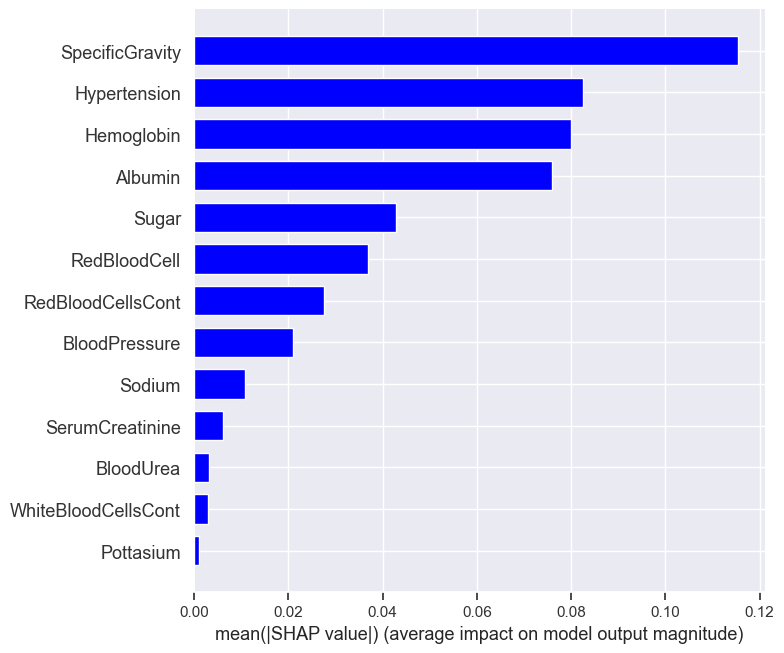

In [65]:
# SHAP variable importance for a Linear Model
shap.summary_plot(svm_shap_values, x_train, plot_type="bar", color="blue")

### Observations

The following plot is

SHAP feature importance plot for SVM model
Using the above plot we can come on the conclusion that the Specific Gravity is the most important feature, followed by Hemoglobin and Hypertension

# Interpret the summary plot SVM Model

Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

The SHAP value plot can show the positive and negative relationships of the predictors with the target variable. 
The code shap.summary_plot(shap_values, X_train)produces the following plot:

This plot is made of all the dots in the train data. It delivers the following information:

1. __Feature importance:__ Variables are ranked in descending order.
2. __Impact:__ The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
3. __Original value:__ Color shows whether that variable is high (in red) or low (in blue) for that observation.
4. __Correlation:__ A high level of the __“Hemoglobin”__ content has a low and positive impact on the target variable(in our case its chronic kidney disease).Which means that the person with high levels of Hemoglobin is less prone to kidney disease. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say the __“Hypertension”__ is positively correlated with the target variable. Which means that the high levels of hyper tension will have high chances of person prone to disease


This visualization is very useful when it comes to interpreting how our model is working.

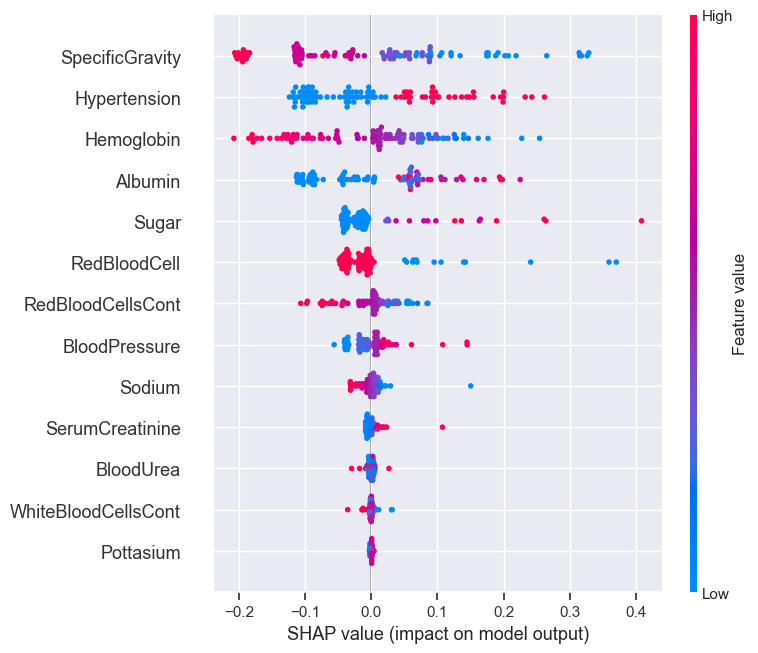

In [66]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, x_train_100)

# SHAP Analysis for Linear and Tree-Based Models

__SHAP (SHapley Additive exPlanations)__ is a method for interpreting the output of machine learning models, and it provides insights into the contribution of each feature to the model's prediction for a particular instance. SHAP values measure the impact of each feature on the model's output for a particular instance, and they provide a unified measure of feature importance that is consistent across different models.

For __linear models__, SHAP values can be calculated using the coefficients of the model as written in code below. The SHAP value for a particular feature is calculated as the product of the coefficient for that feature and the difference between the prediction with that feature included and the prediction with that feature excluded.

For __tree-based models__, SHAP values can be calculated using the tree structure and the feature values of a particular instance. The SHAP value for a particular feature is calculated as the difference between the average prediction of the model with that feature present in the tree and the average prediction of the model with that feature absent in the tree, over all possible subsets of features.

Permutation explainer: 361it [00:22,  9.16it/s]                                                                        


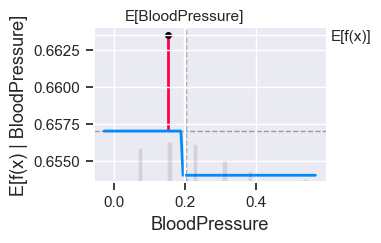

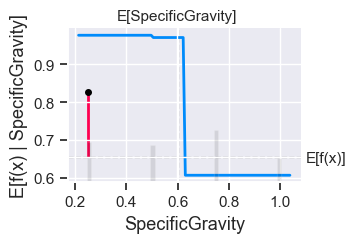

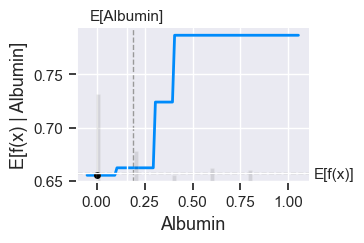

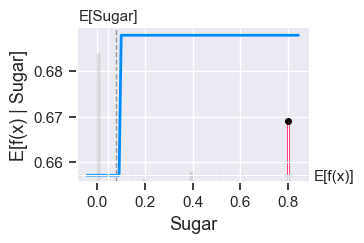

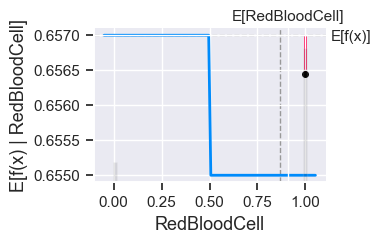

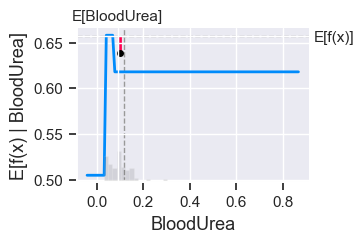

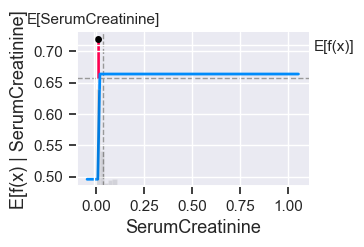

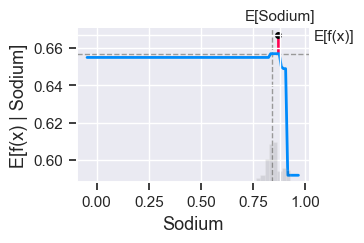

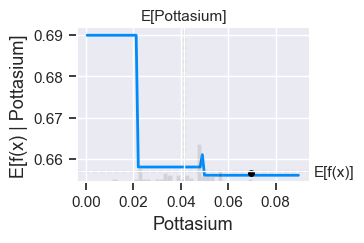

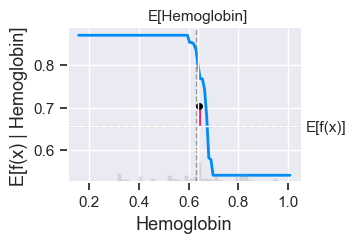

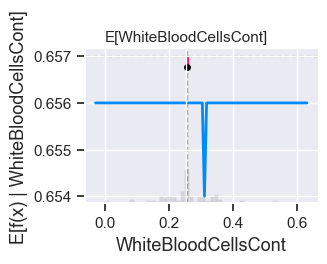

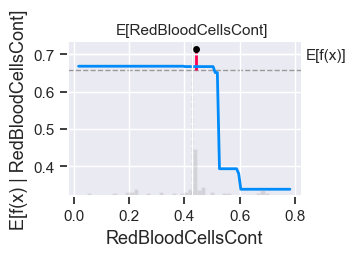

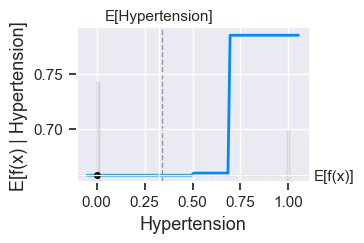

In [67]:
   #This code is performing a SHAP partial dependence plot for a Tree Model
tree_explainer = shap.Explainer(tree_model.predict, x_train_100)
tree_shap_values = tree_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 31
    fig, ax = plt.subplots(figsize=(3,2)) # Create a new figure with the desired size
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
        ax=ax
    )

# Analysis
1. This code generates a partial dependence plot for each feature in the __x_train__ dataframe using the SHAP values calculated for the tree-based model. The resulting plots show the effect of each feature on the model's prediction for a single sample.

2. Let us take a feature of Blood Pressure --For Tree-based model the cross is made at approx E[f(x)] 0.633(Aprox)
3. So as the Blood Pressure increases the expected value also increases

4. The red line on the plot - When we give a sample as an input (sample_ind = 31) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.


__Note:__The tree_model object is assumed to be a tree-based model, such as a decision tree, random forest, or gradient boosting machine. Tree-based models have a different internal structure compared to linear models, and SHAP values for tree-based models are calculated differently. The tree_explainer object is designed to handle these differences and calculate SHAP values for tree-based models.

Permutation explainer: 361it [00:11,  2.99it/s]                                                                        


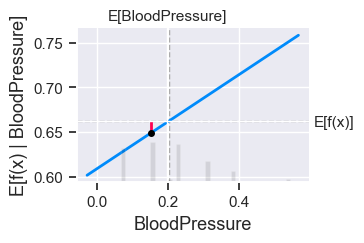

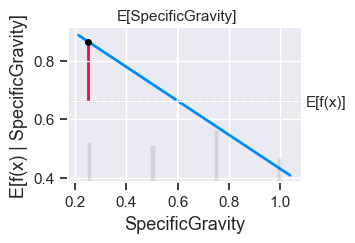

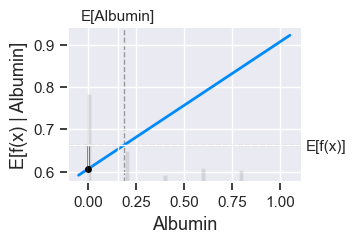

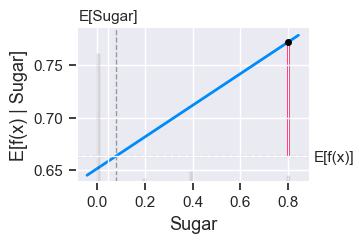

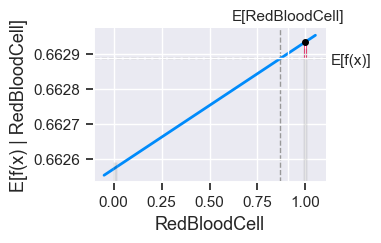

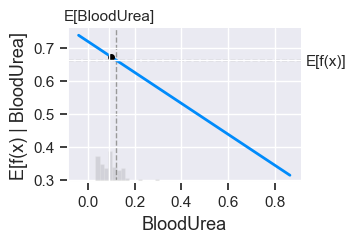

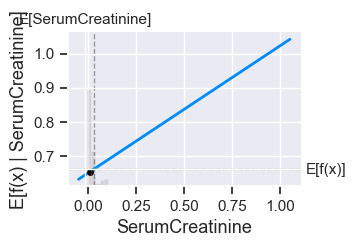

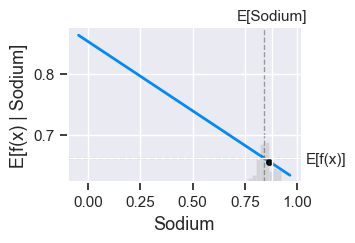

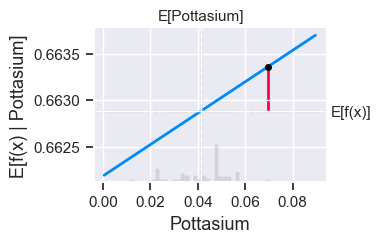

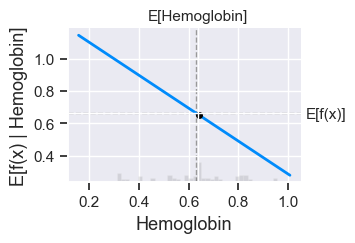

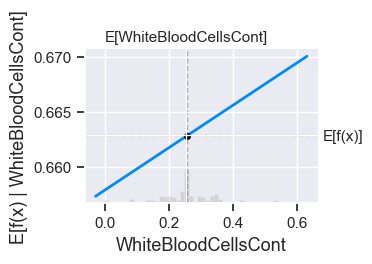

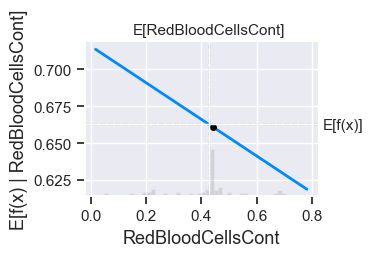

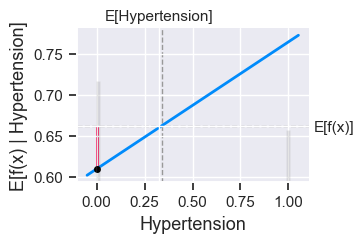

In [68]:
import matplotlib.pyplot as plt
#This code is performing a SHAP partial dependence plot for a linear model

linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(x_train)

for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 31
    fig, ax = plt.subplots(figsize=(3,2)) # Create a new figure with the desired size
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
        ax=ax # Pass the axes of the new figure to the function
    )

# Analysis:
1. The above code generates a partial dependence plot for each feature in the __x_train__ dataframe using the SHAP values calculated for the linear model. The resulting plots show the effect of each feature on the model's prediction for a single sample(I have taken sample number 31)

2. Since the focus is on generating partial dependence plots for each feature to visualize the marginal effect of each feature on the model's prediction, ICE plots are not necessary and can be computationally expensive to generate.

3. Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

4. Let us take a feature of Blood Pressure
     -- For the linear model the cross is made at approx E[f(x)] 0.667(Approx)
     
5. So as the Blood Pressure increases the expected value also increases

6. The red line on the plot - When we give a sample as an input (sample_ind = 31) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

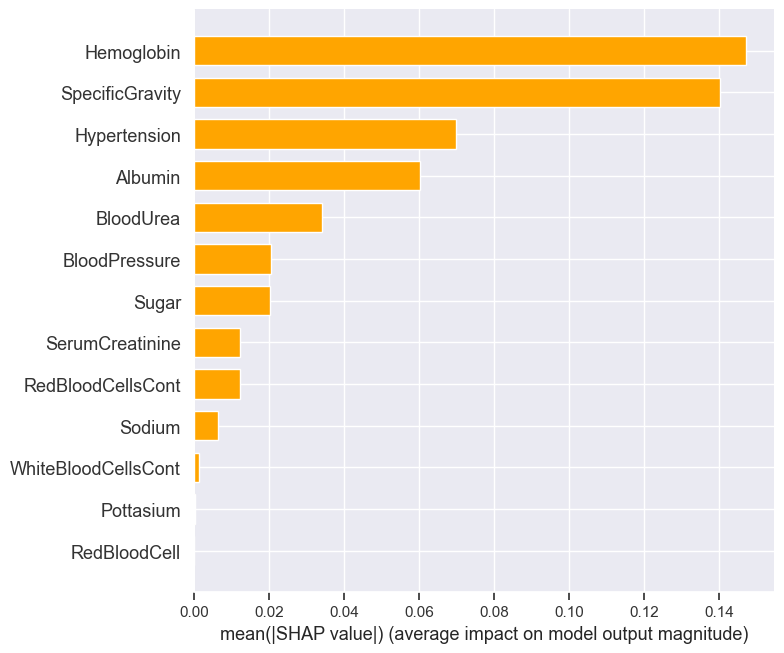

In [69]:


# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="orange")

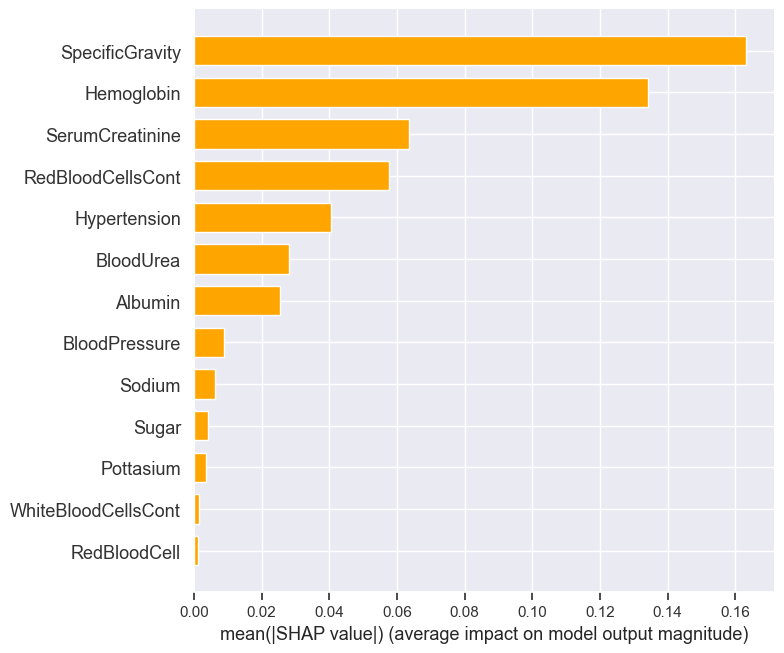

In [70]:

# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="orange")

## Observations:
A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power. The shap.summary_plot function with plot_type=”bar” lets you produce the variable importance plot.# 


## Interpret the summary plot for the Linear and Tree-based model
The SHAP value plot can show the positive and negative relationships of the predictors with the target variable. The code produces the following plot

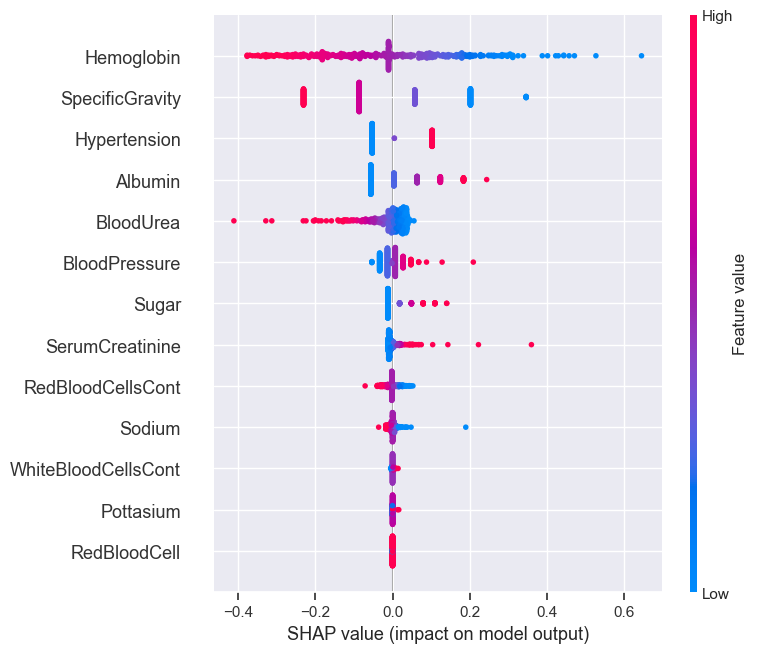

In [71]:

# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

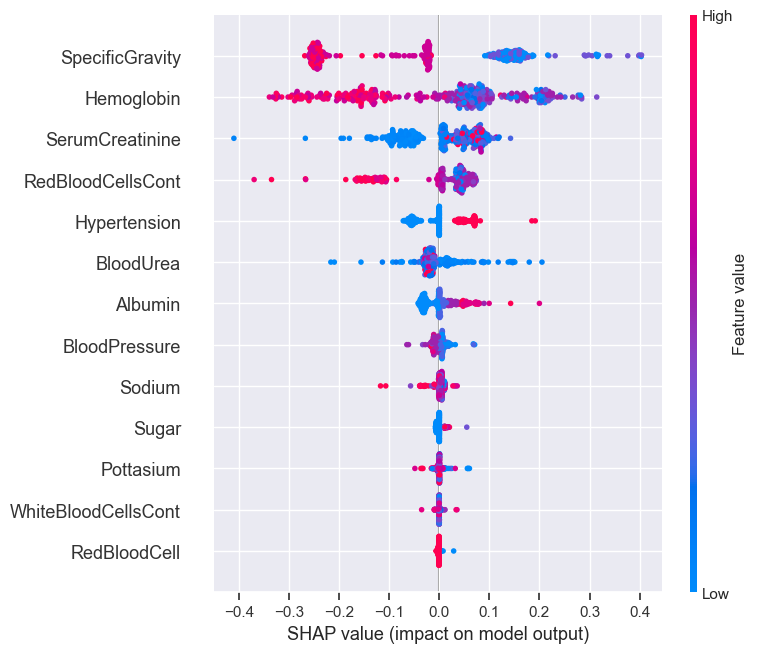

In [72]:
# SHAP summary for Tree Model
shap.summary_plot(tree_shap_values, x_train)

# Observations:
The SHAP value plot can show the positive and negative relationships of the predictors with the target variable. 
The code shap.summary_plot(shap_values, X_train)produces the following plot:

This plot is made of all the dots in the train data. It delivers the following information:

1. __Feature importance:__ Variables are ranked in descending order.
2. __Impact:__ The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
3. __Original value:__ Color shows whether that variable is high (in red) or low (in blue) for that observation.
4. __Correlation:__ A high level of the __“Hemoglobin”__ content has a low and positive impact on the target variable(in our case its chronic kidney disease).Which means that the person with high levels of Hemoglobin is less prone to kidney disease. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say the “Hypertension” is positively correlated with the target variable. Which means that the high levels of hyper tension will have high chances of person prone to disease

# Interpreting SHAP dependence plot for Linear and Tree-based model

Lets visuilize SHAP dependence plot. A partial dependence plot shows the marginal effect of one or two features on the predicted outcome of a machine learning model . It tells whether the relationship between the target and a feature is linear, monotonic or more complex. 

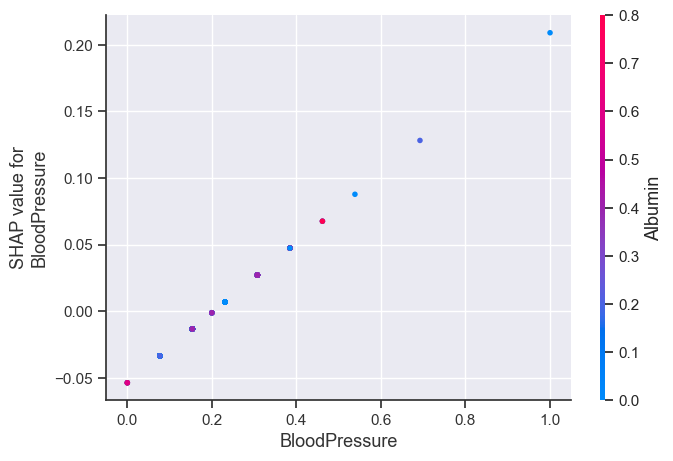

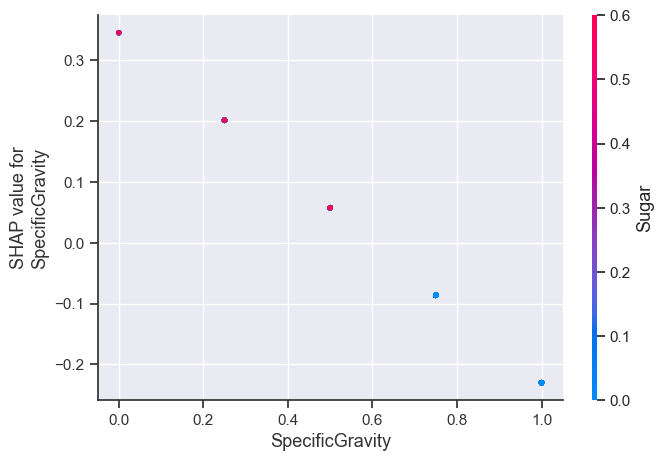

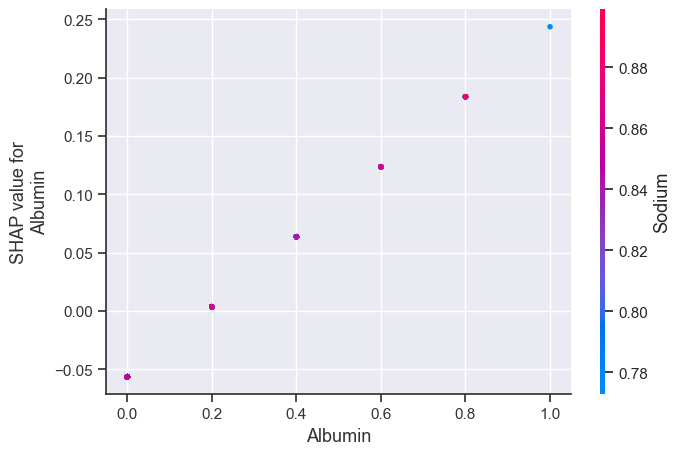

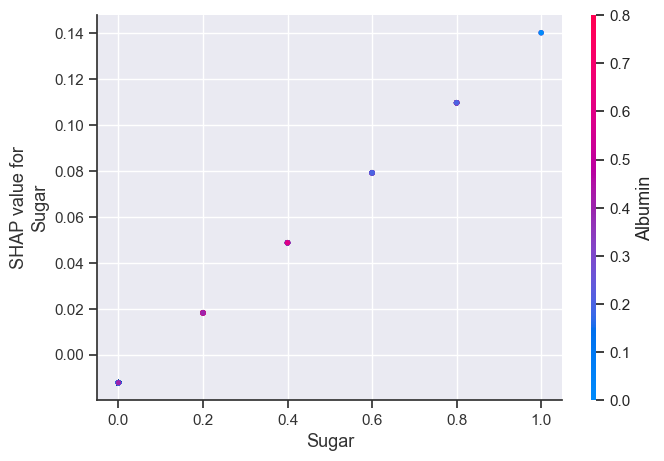

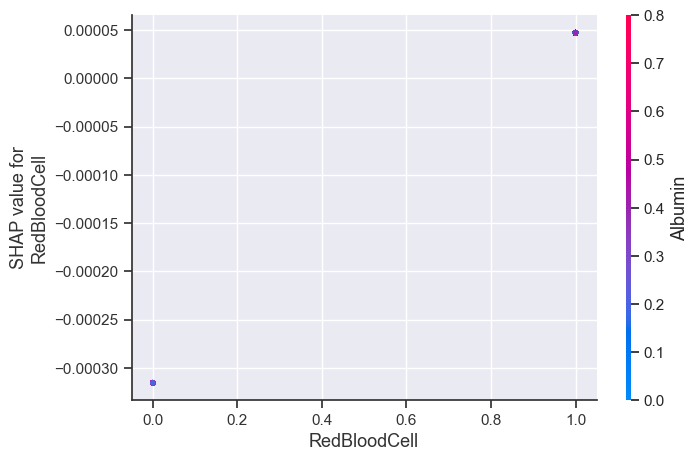

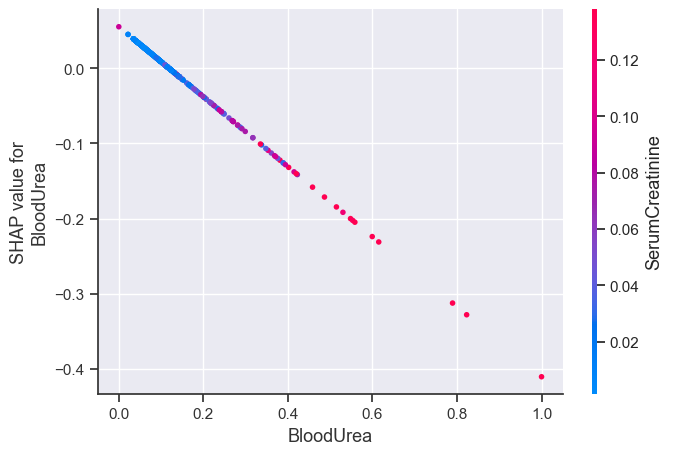

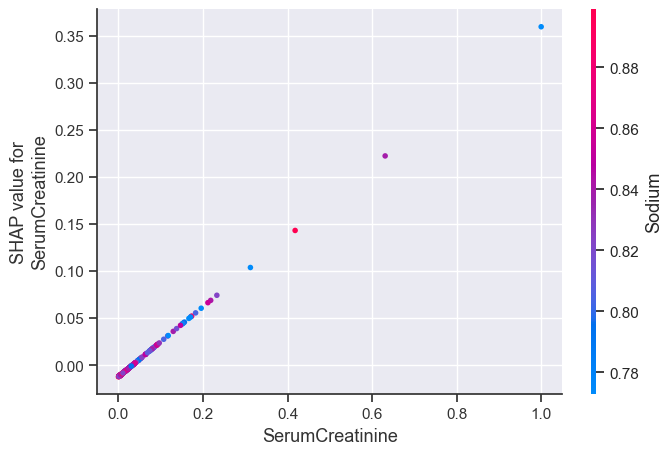

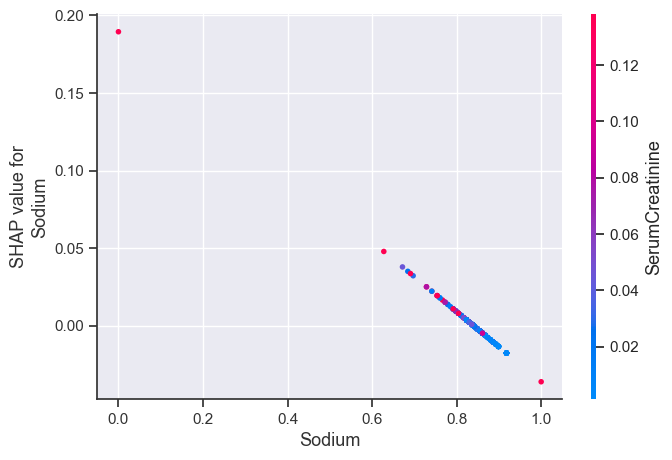

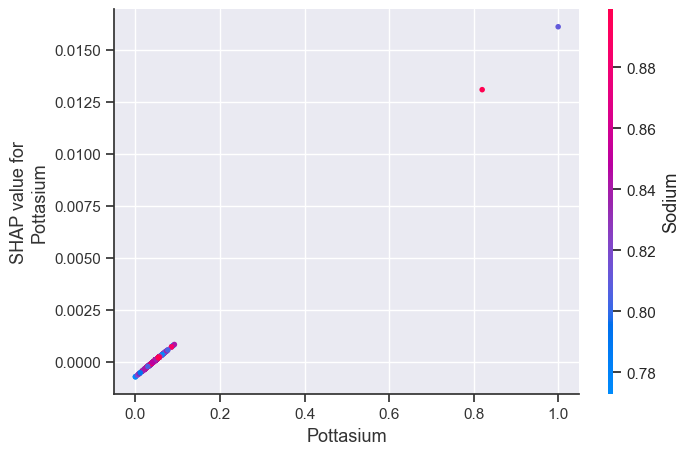

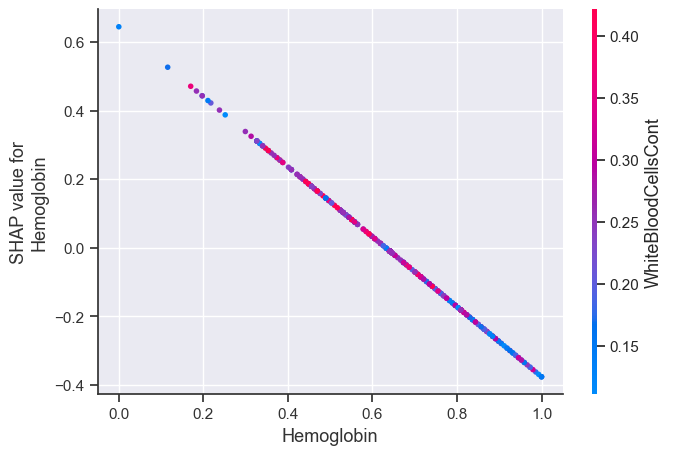

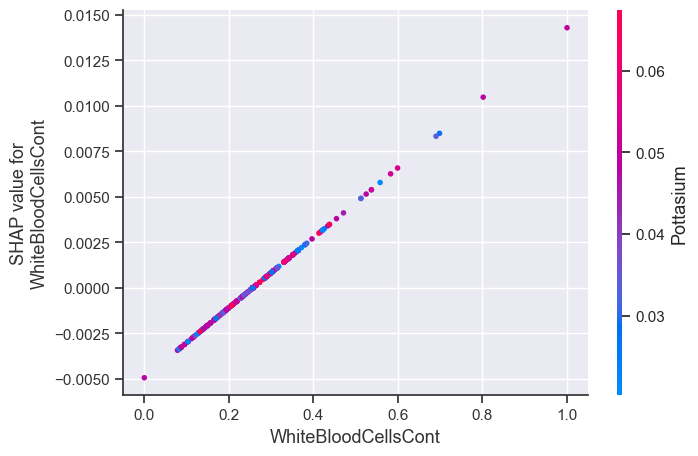

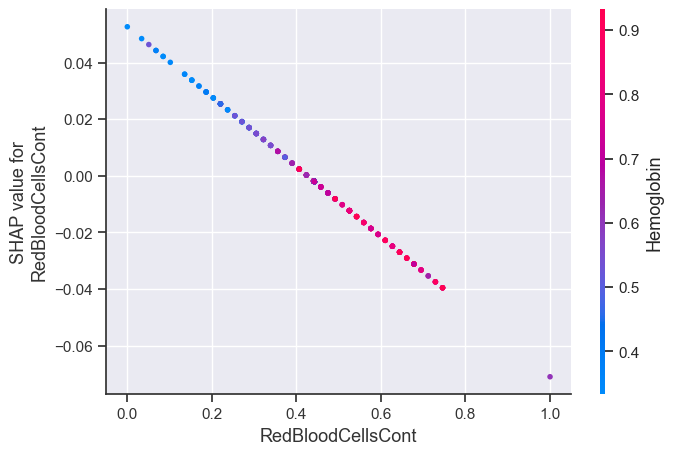

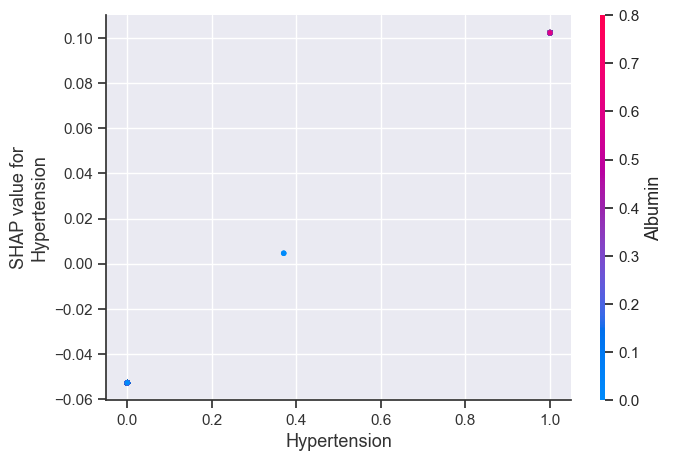

In [73]:

# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

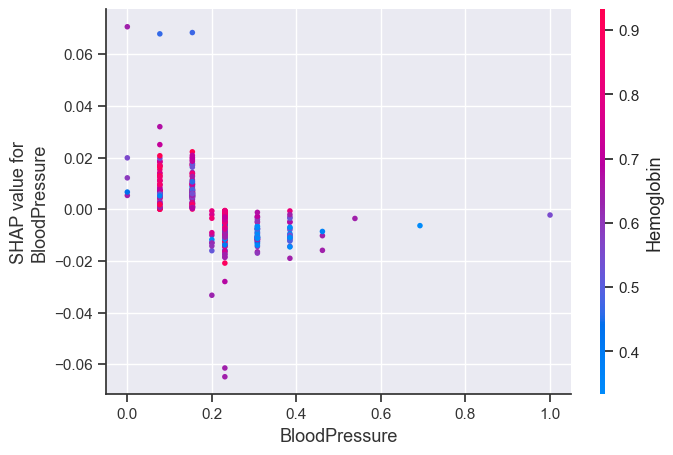

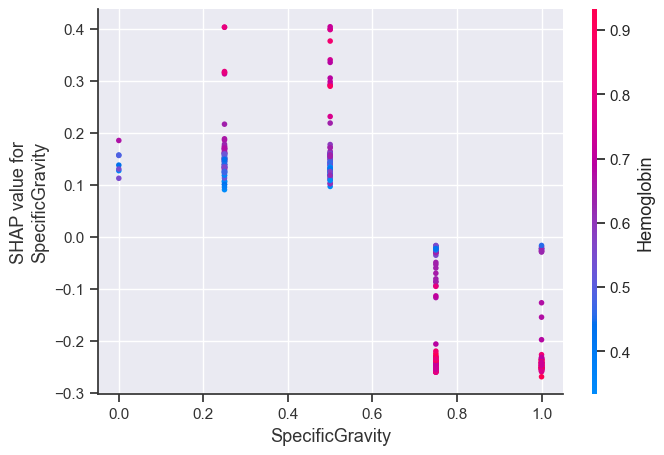

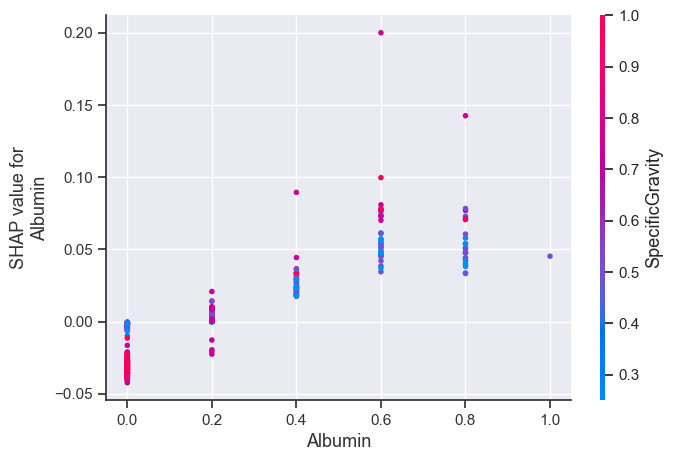

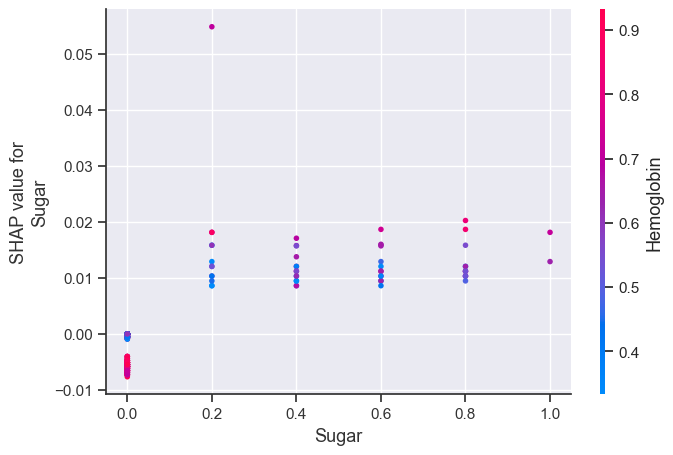

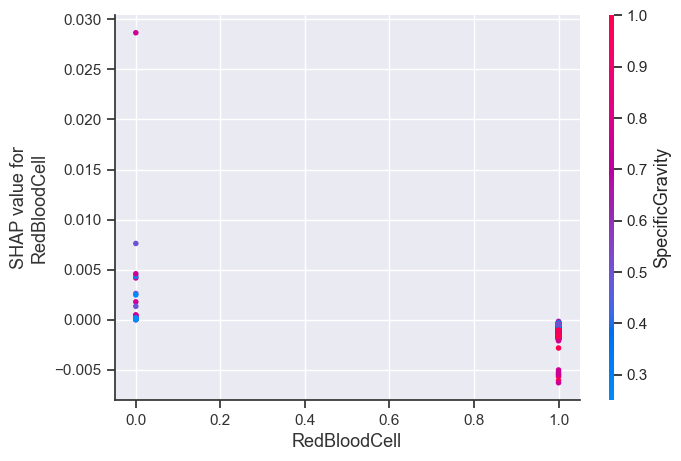

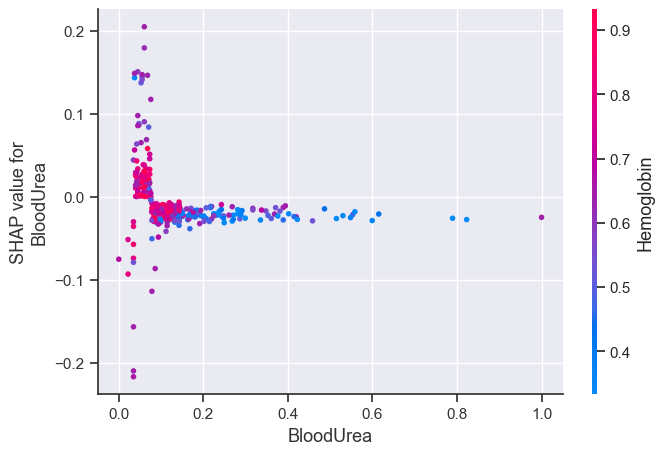

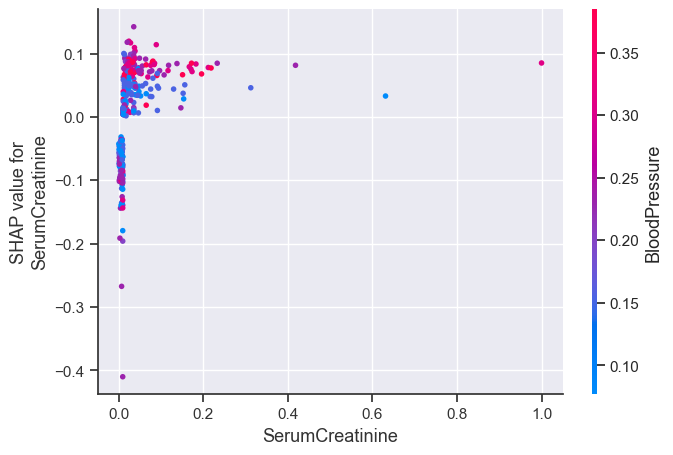

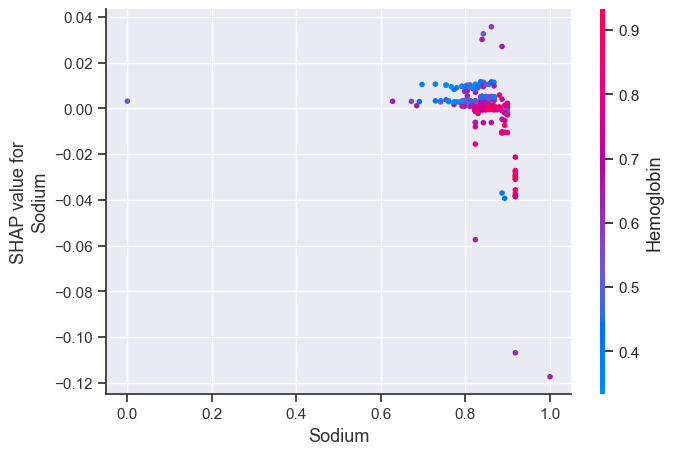

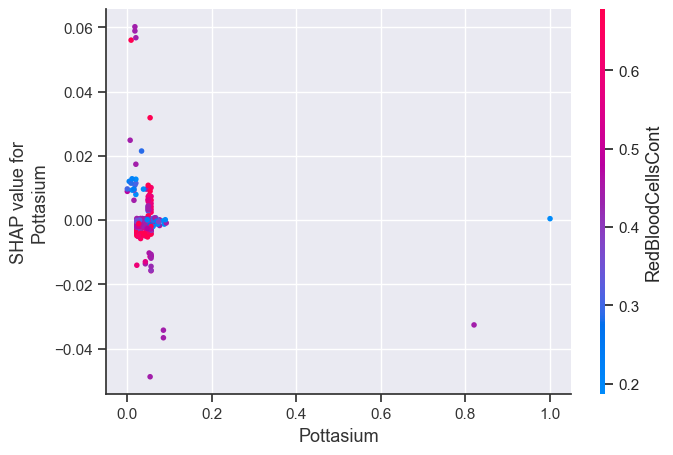

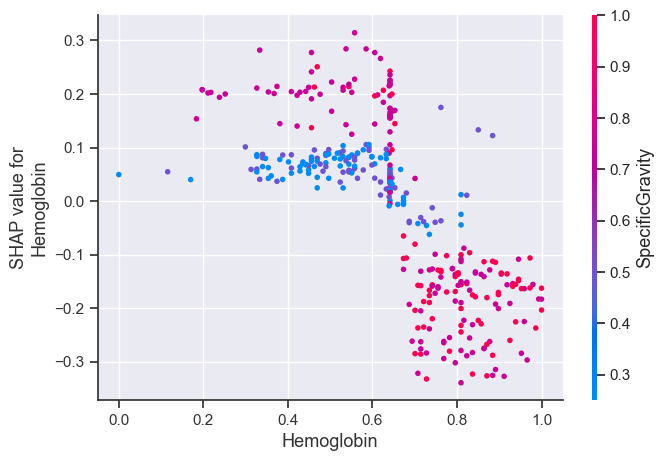

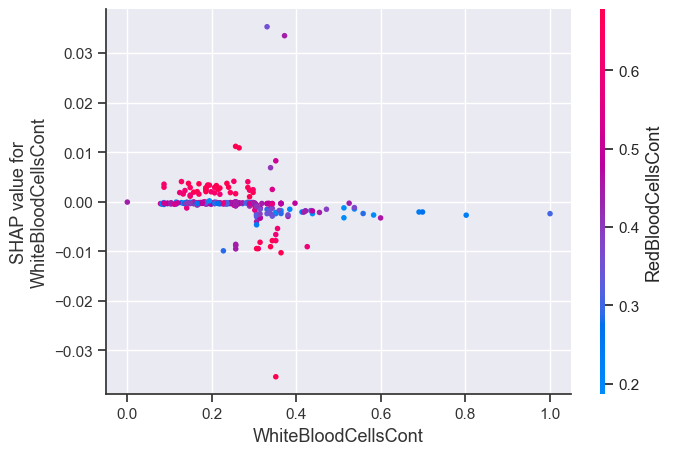

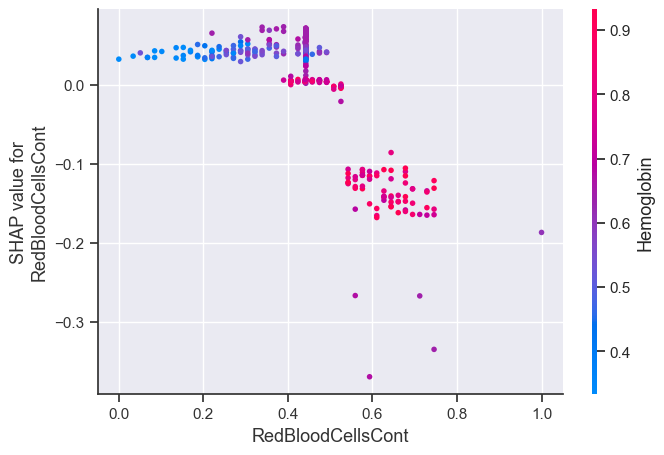

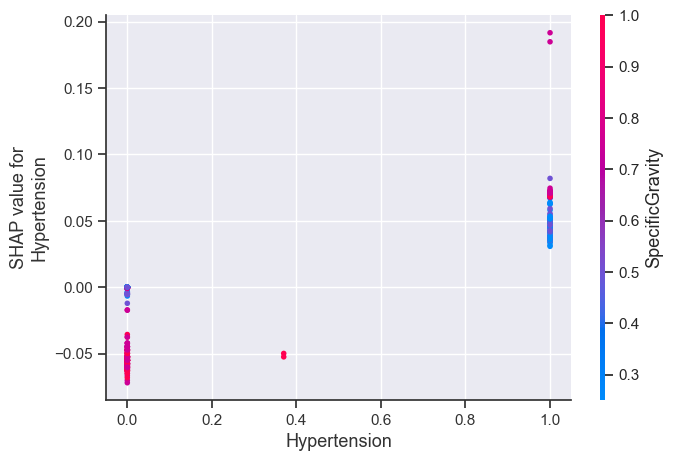

In [74]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

# Observations
- To create a dependence plot, we only need single line of code: shap.dependence_plot(“Feature”, shap_values, X_train). Here I have iterated over all 14 features and plotted the graphs. 
- The function here automatically includes another variable that your chosen variable interacts most with.
- The first plot show there is an approximately linear and positive trend between “Blood Presssure” and the target variable, and “Blood Pressure” interacts with “Hypertension” frequently.
- Suppose if we want to know “Specific Gravity”, as well as the variable that it interacts with the most, you can do shap.dependence_plot(“Specific Gravity”, shap_values, X_train). The output will be same as my 2nd figure of linear model.
- The 2nd plots show there exists an approximately linear but negative relationship between “Specific Gravity” and the target variable. 

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


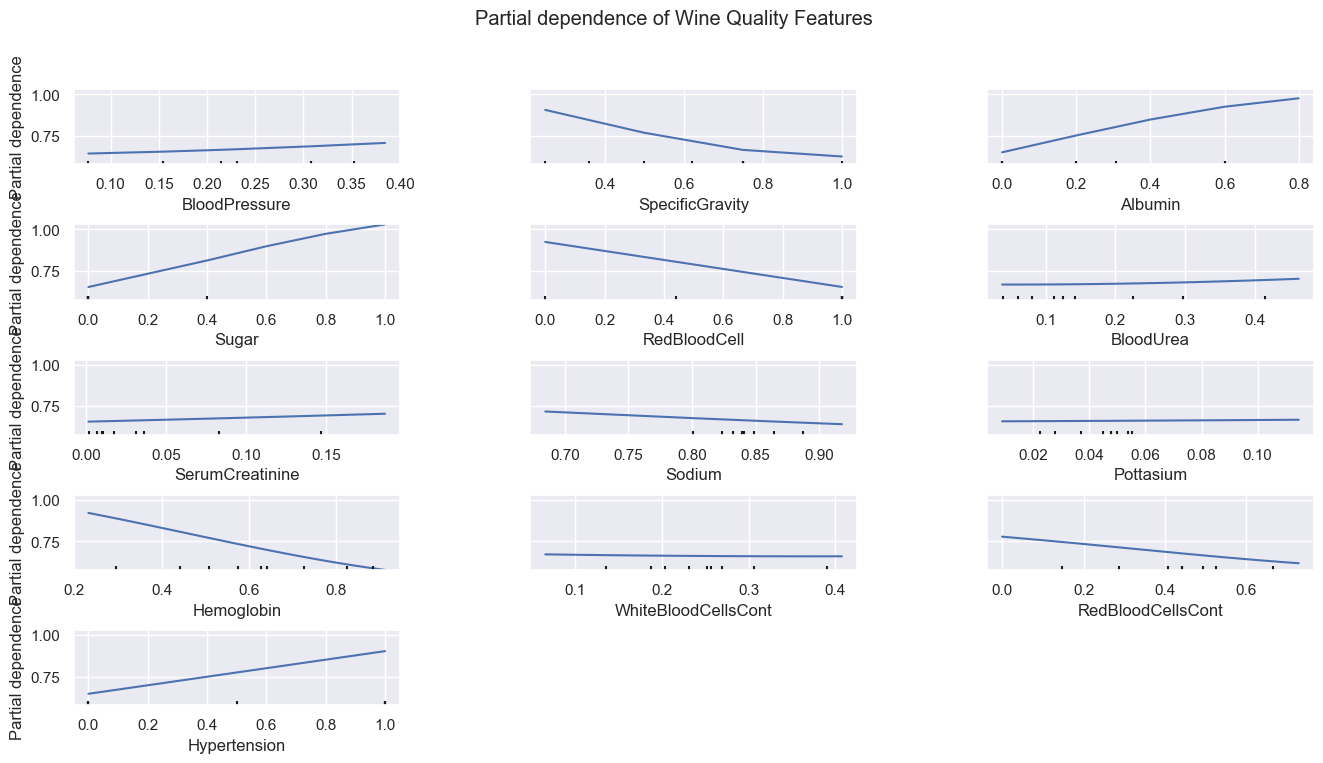

In [75]:

# PDP Plot for Tree based Model
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(svm_model, x_test, x_test.columns, n_jobs=3, grid_resolution=20)


fig = plt.gcf()
plt.rcParams["figure.figsize"] = (20, 10)
fig.suptitle("Partial dependence of Wine Quality Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.rcParams["figure.figsize"] = (32, 24)
plt.show()

# Interpreting AutoML's best model with tuned hyperparameters



# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

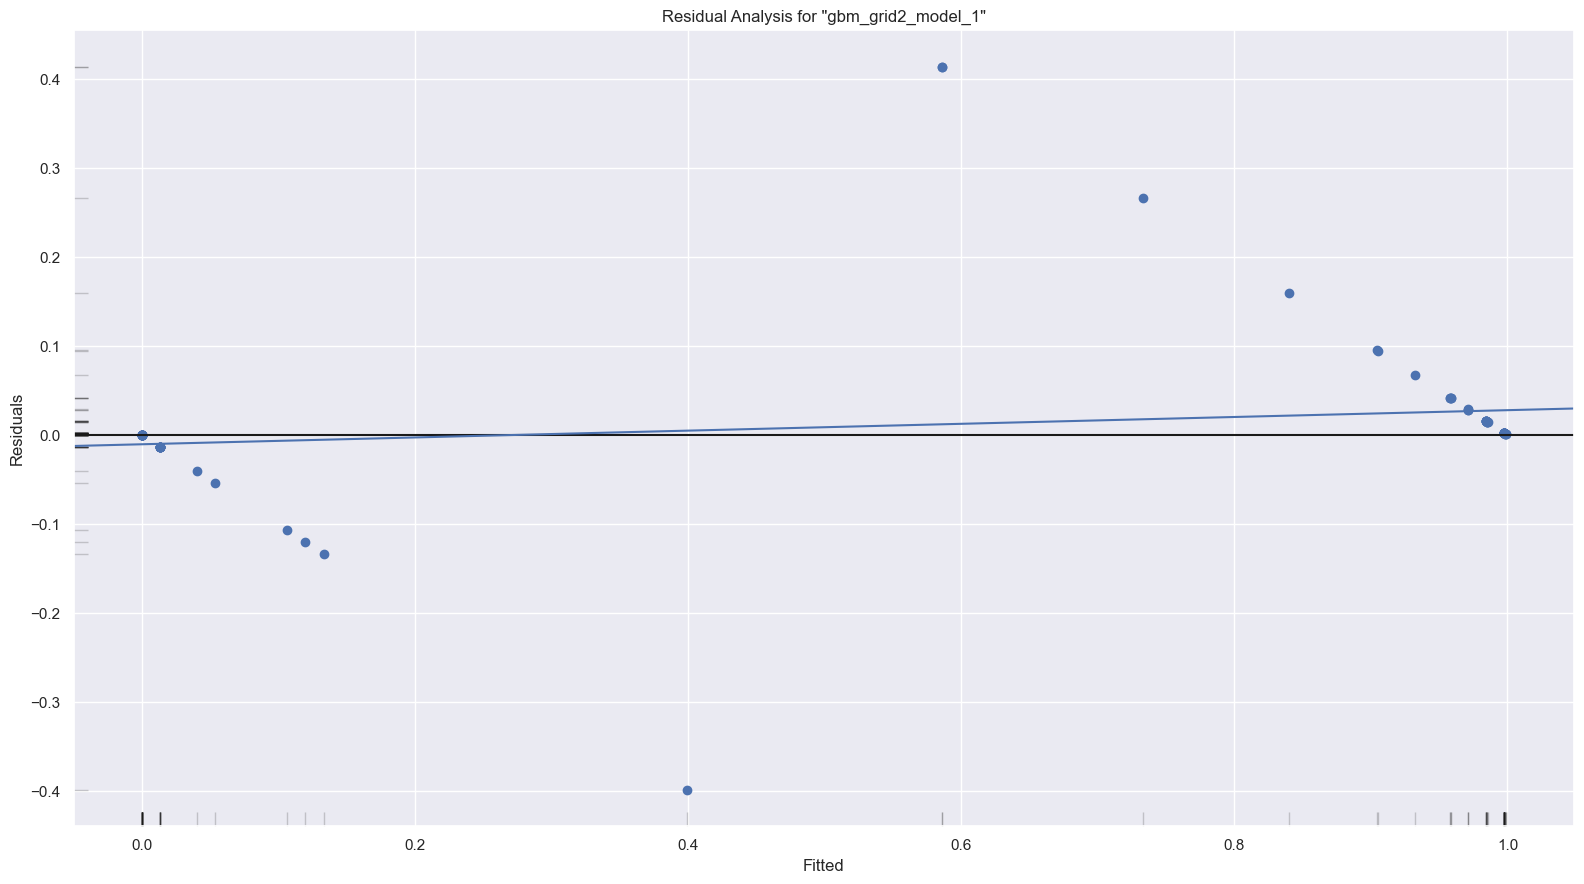

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

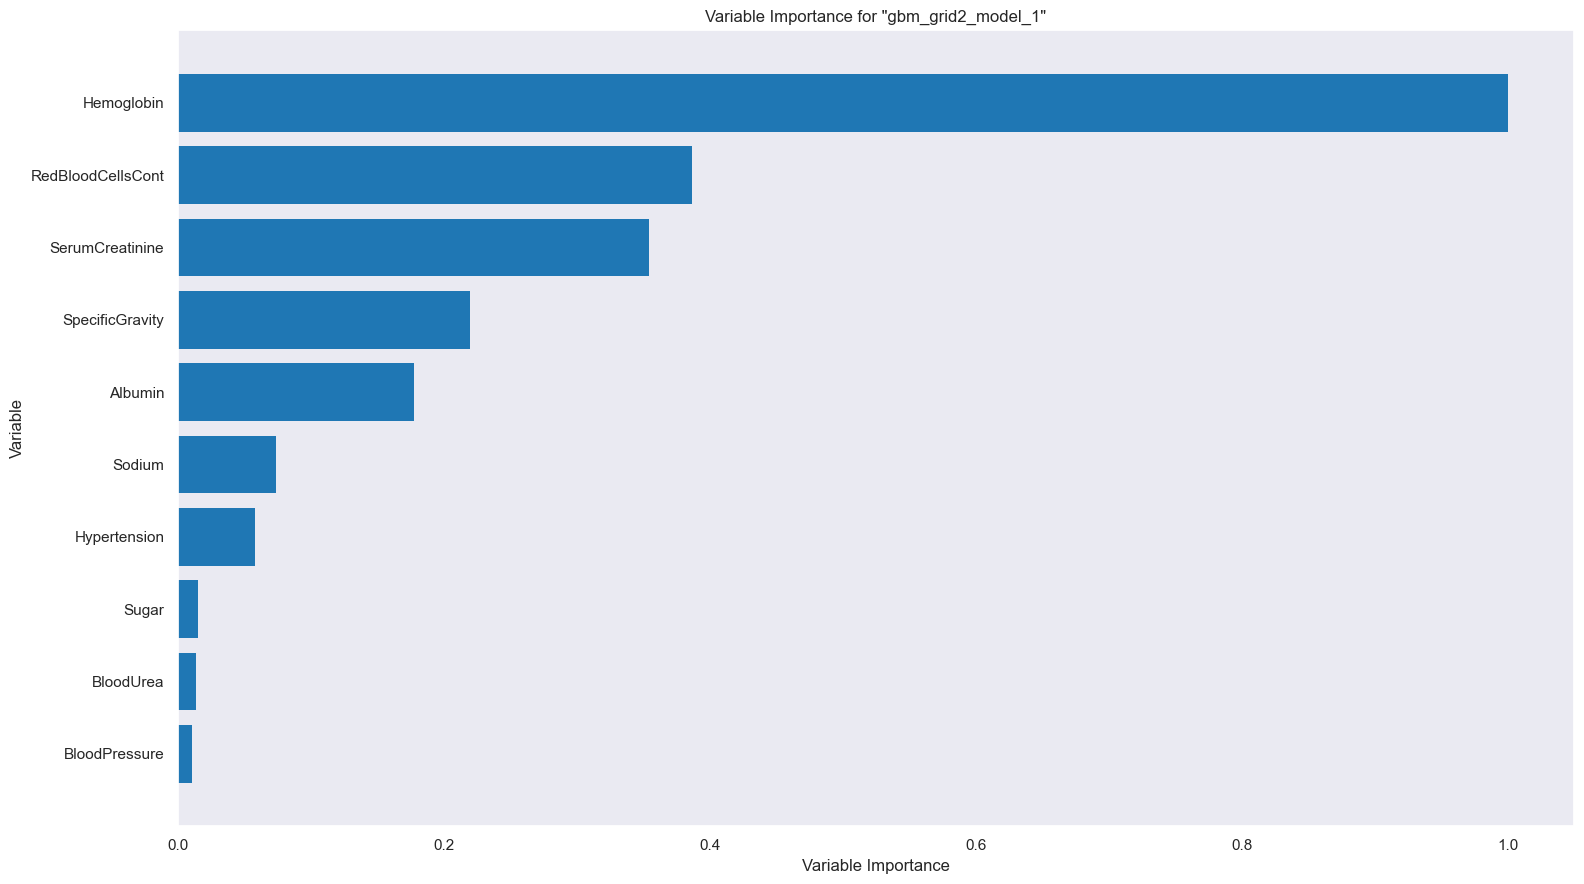

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

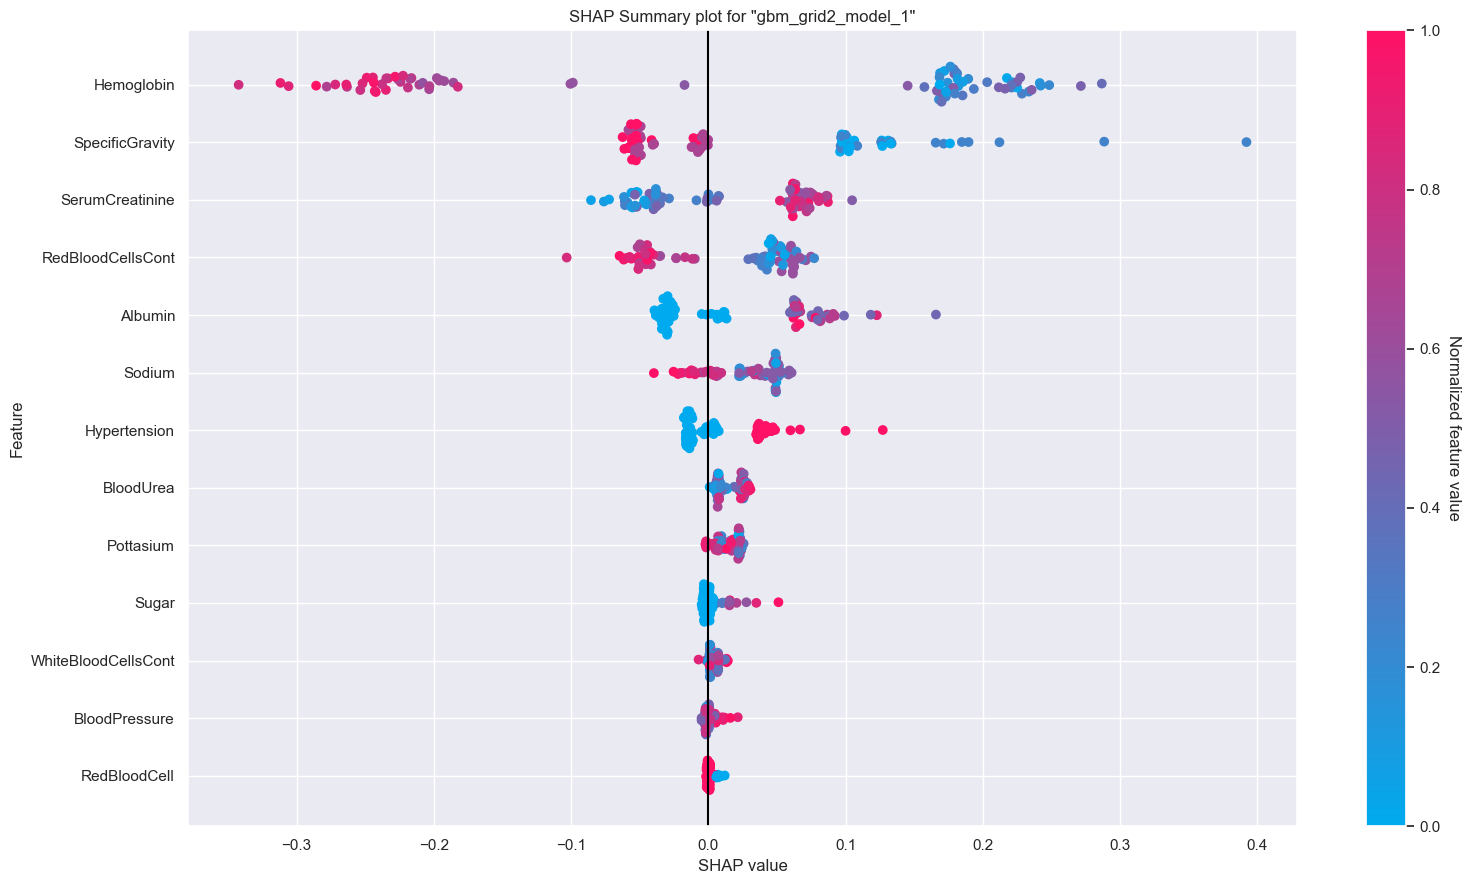

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

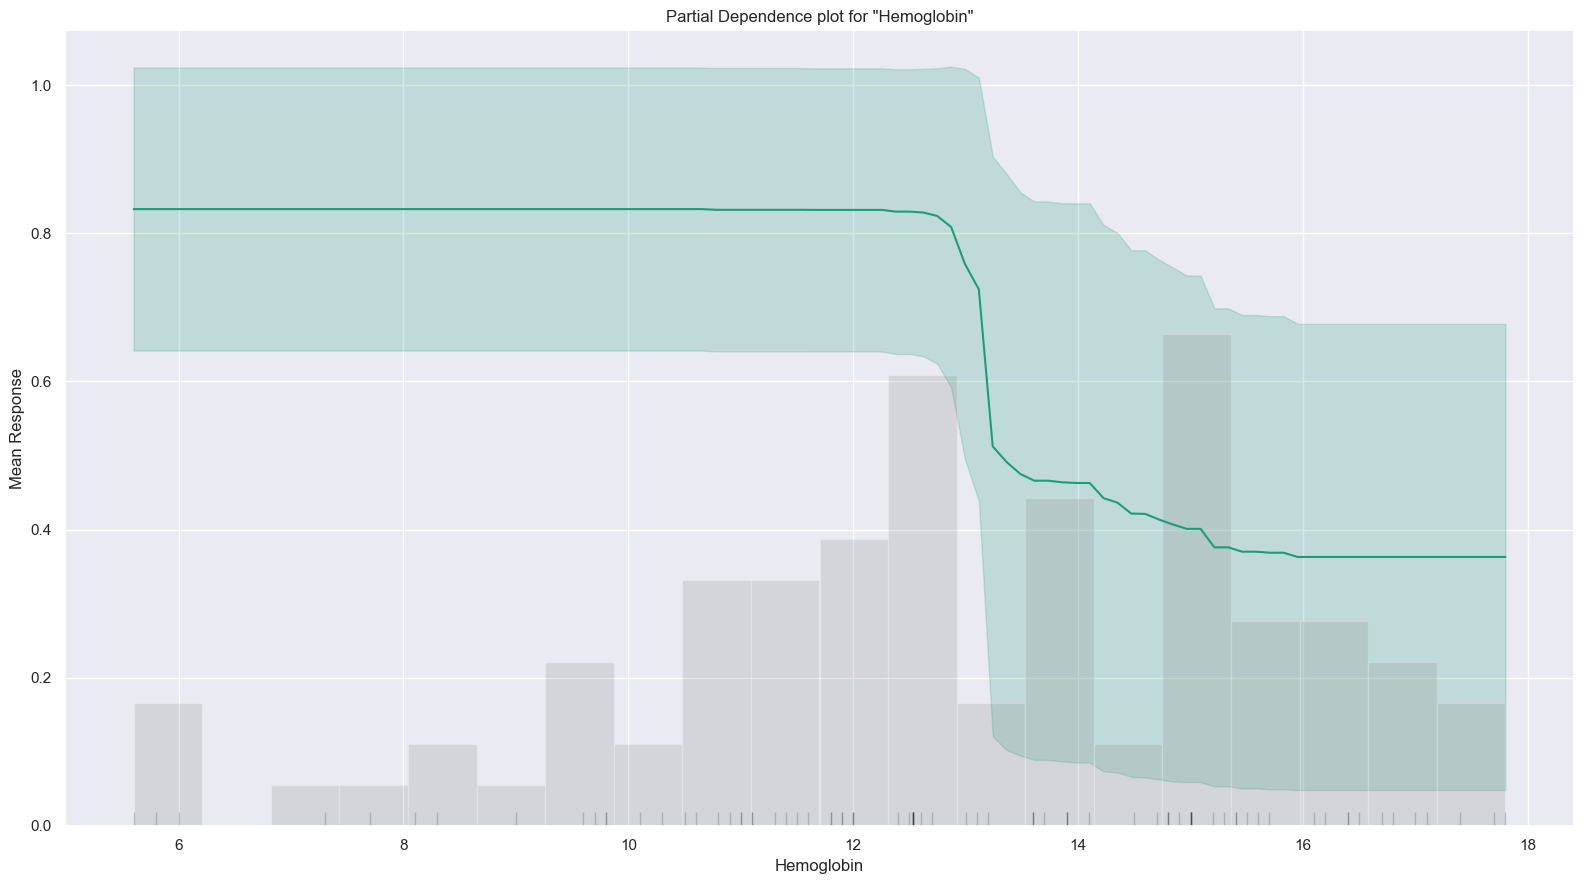

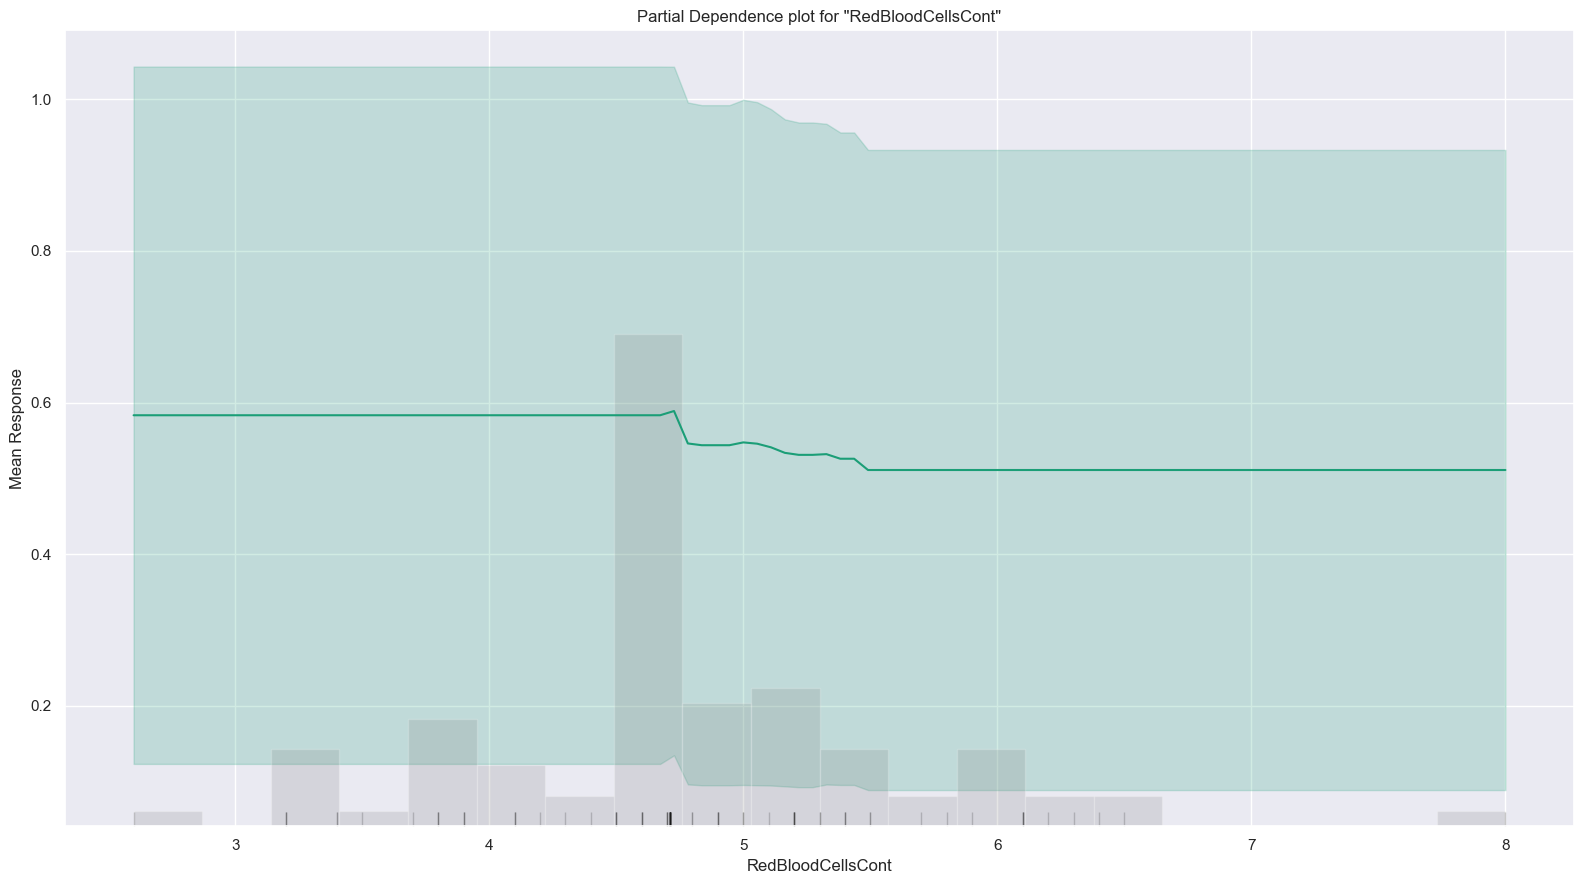

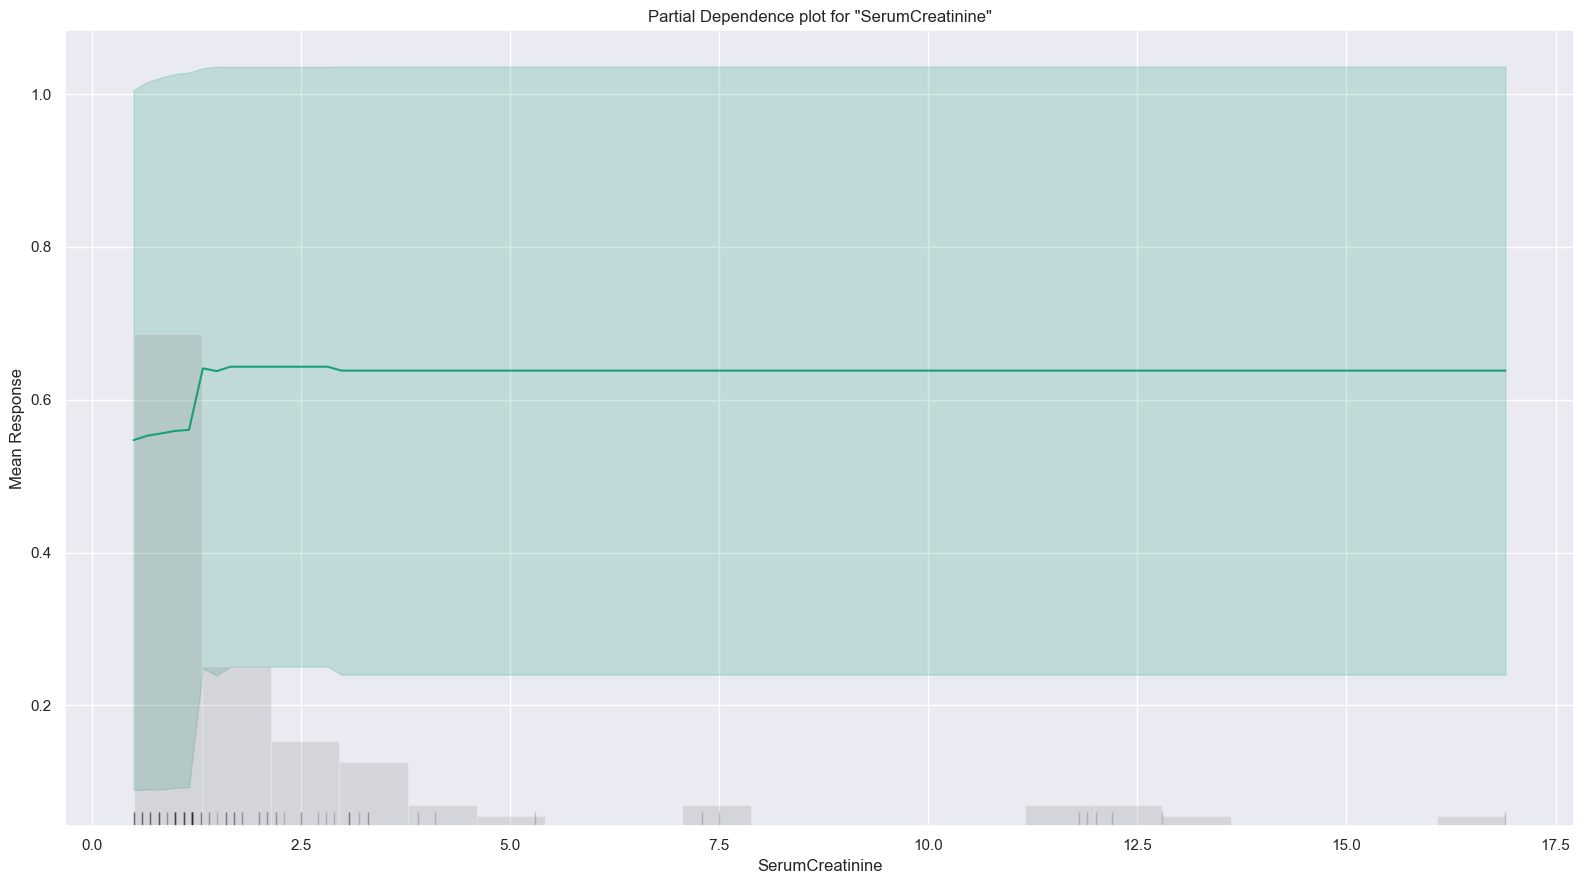

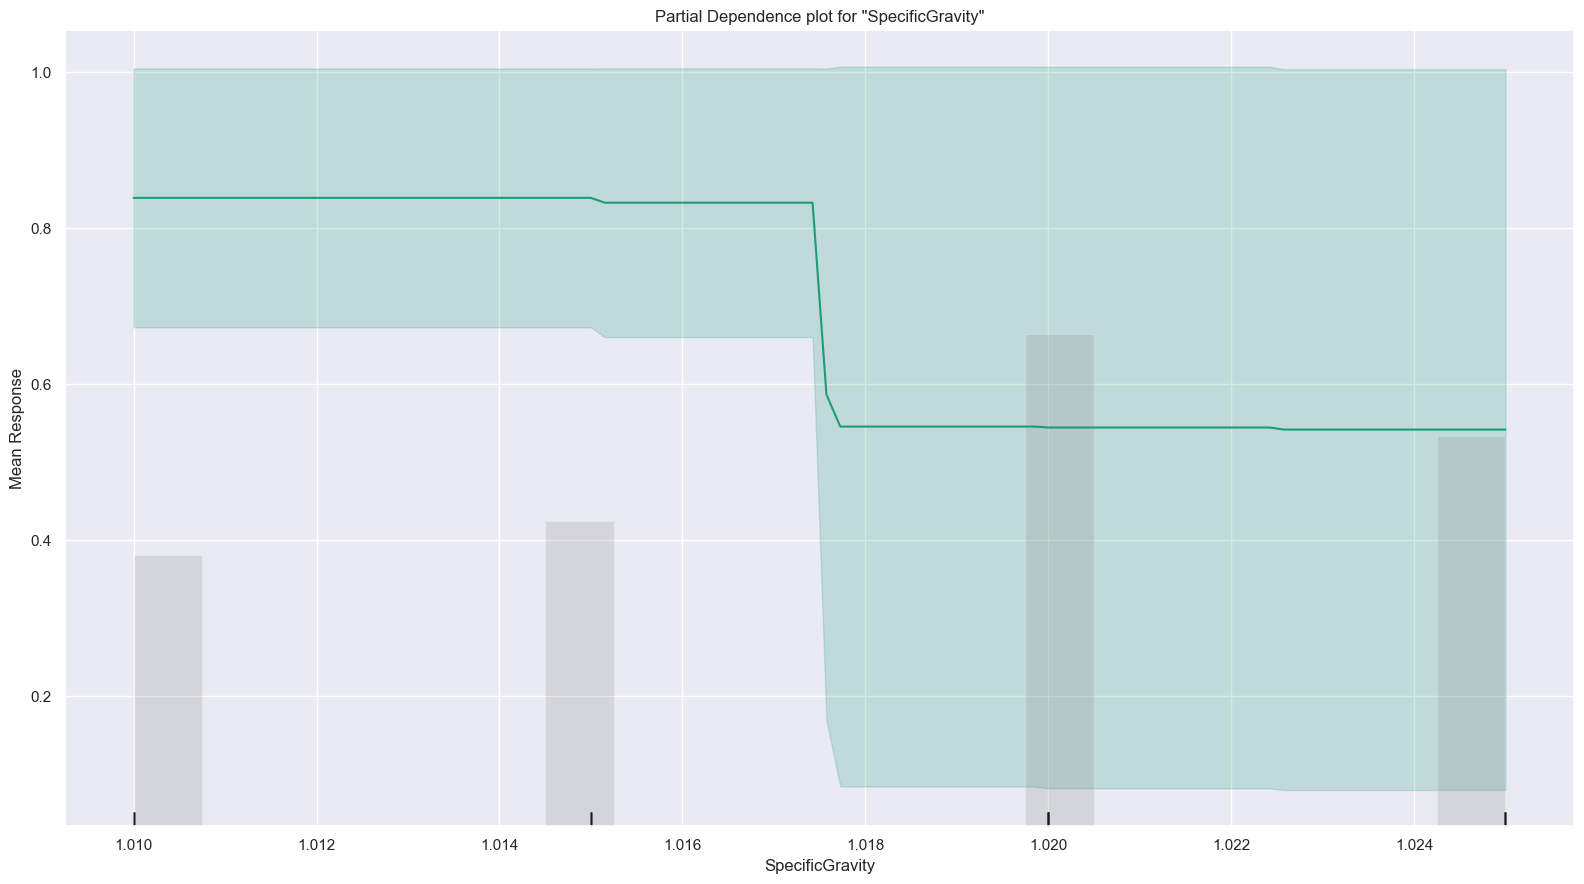

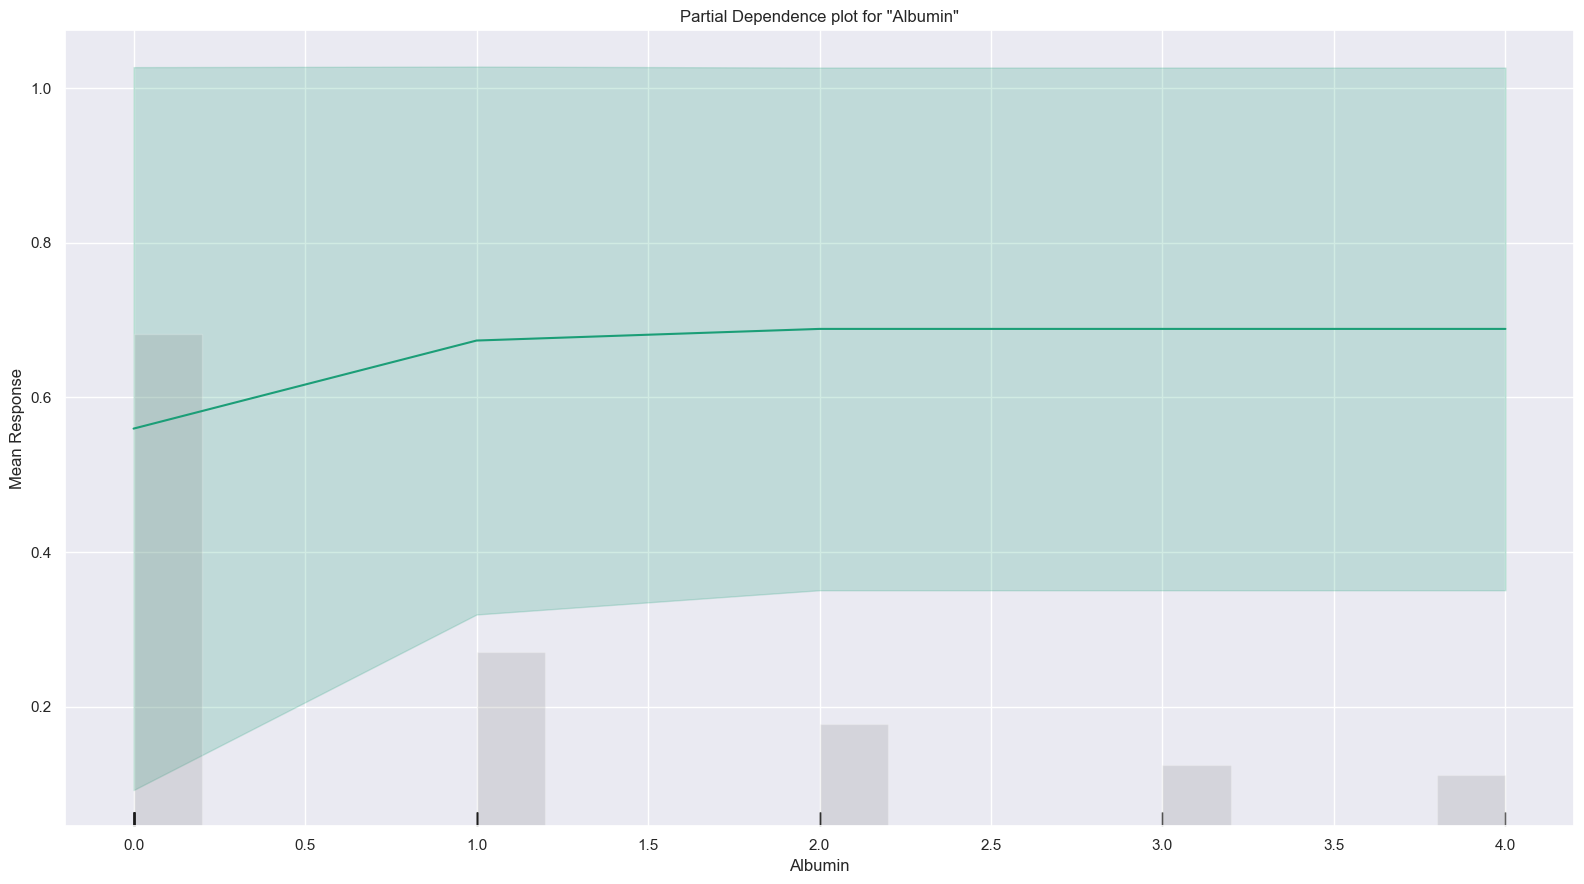

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

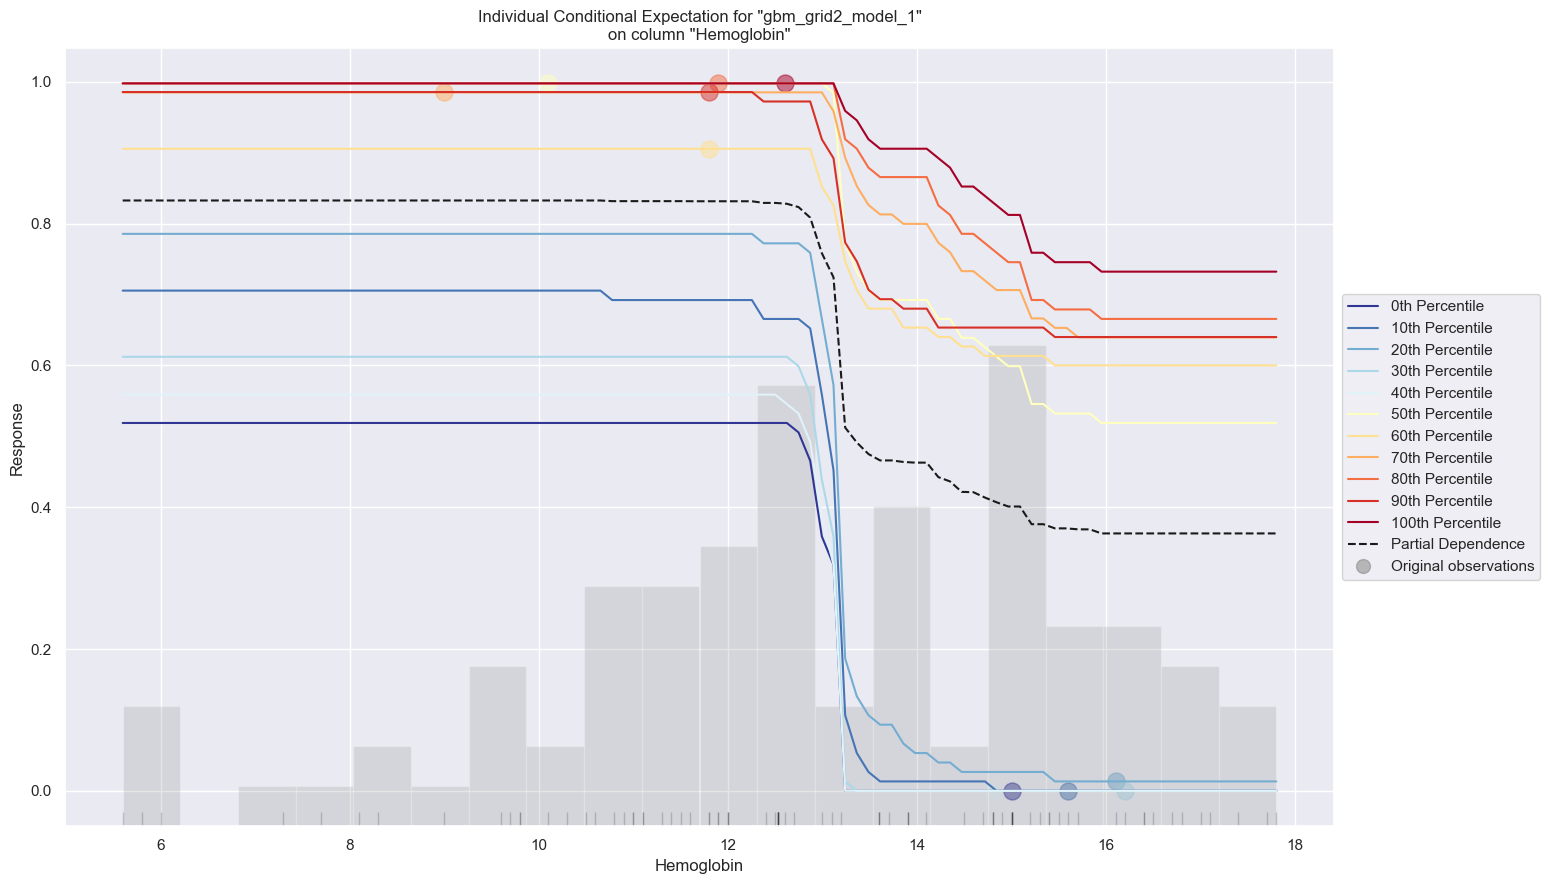

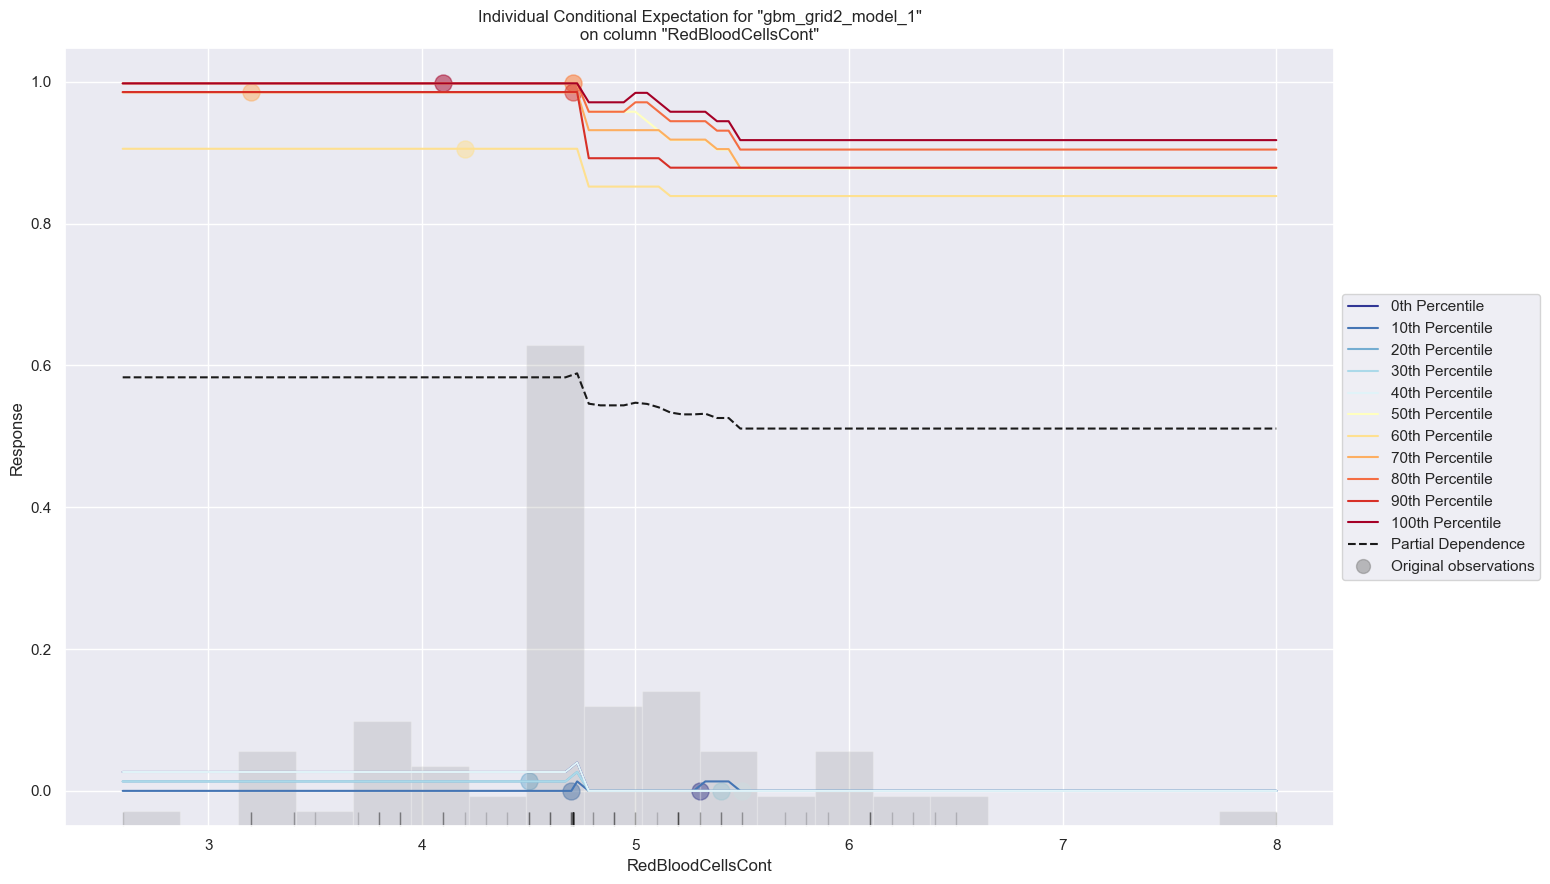

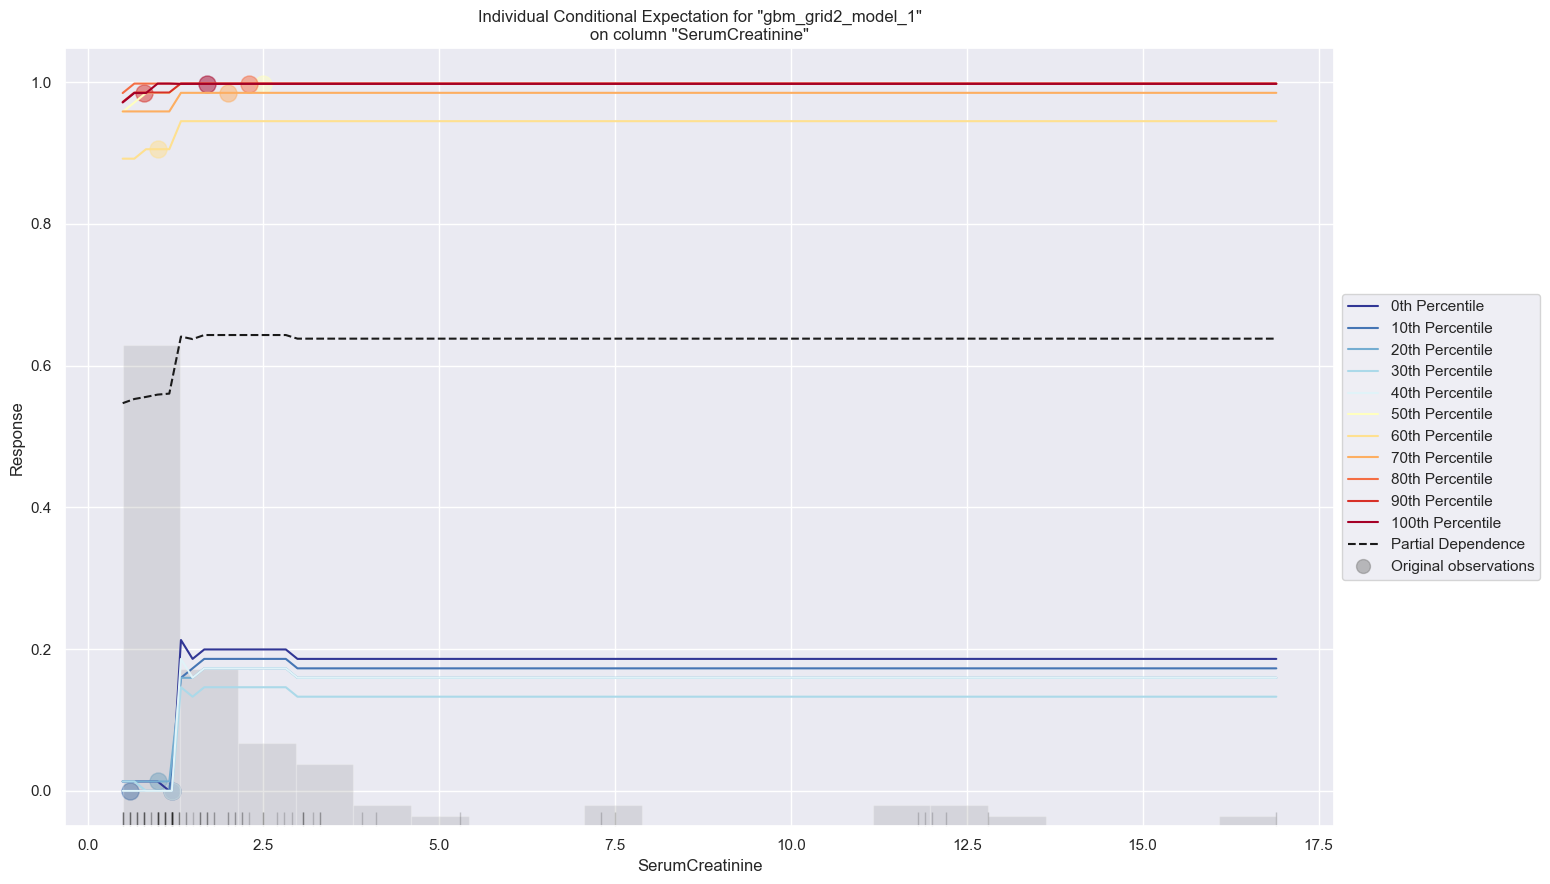

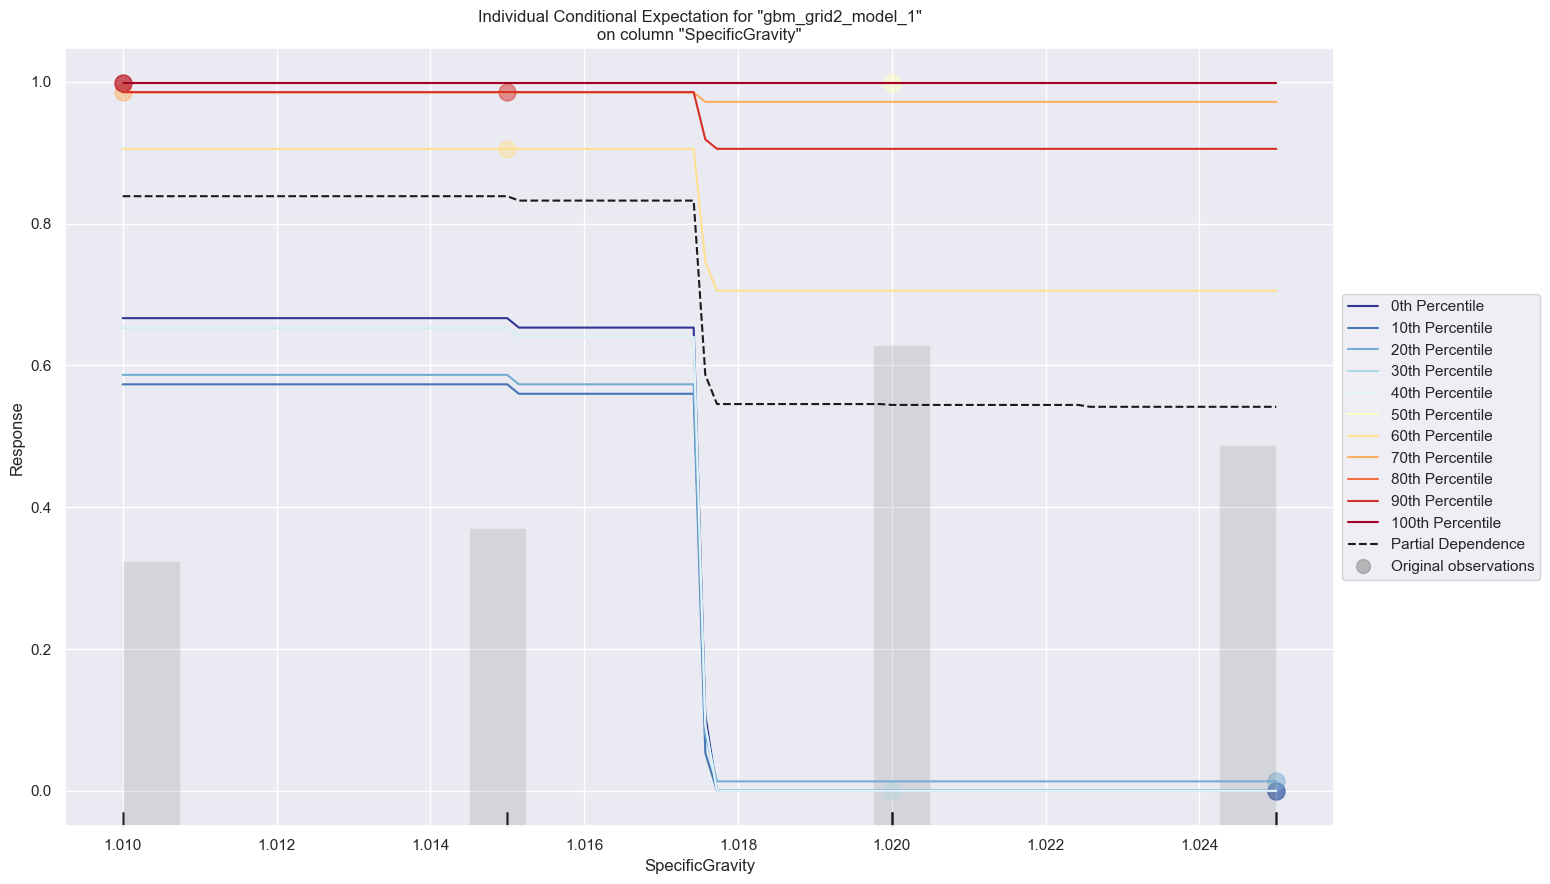

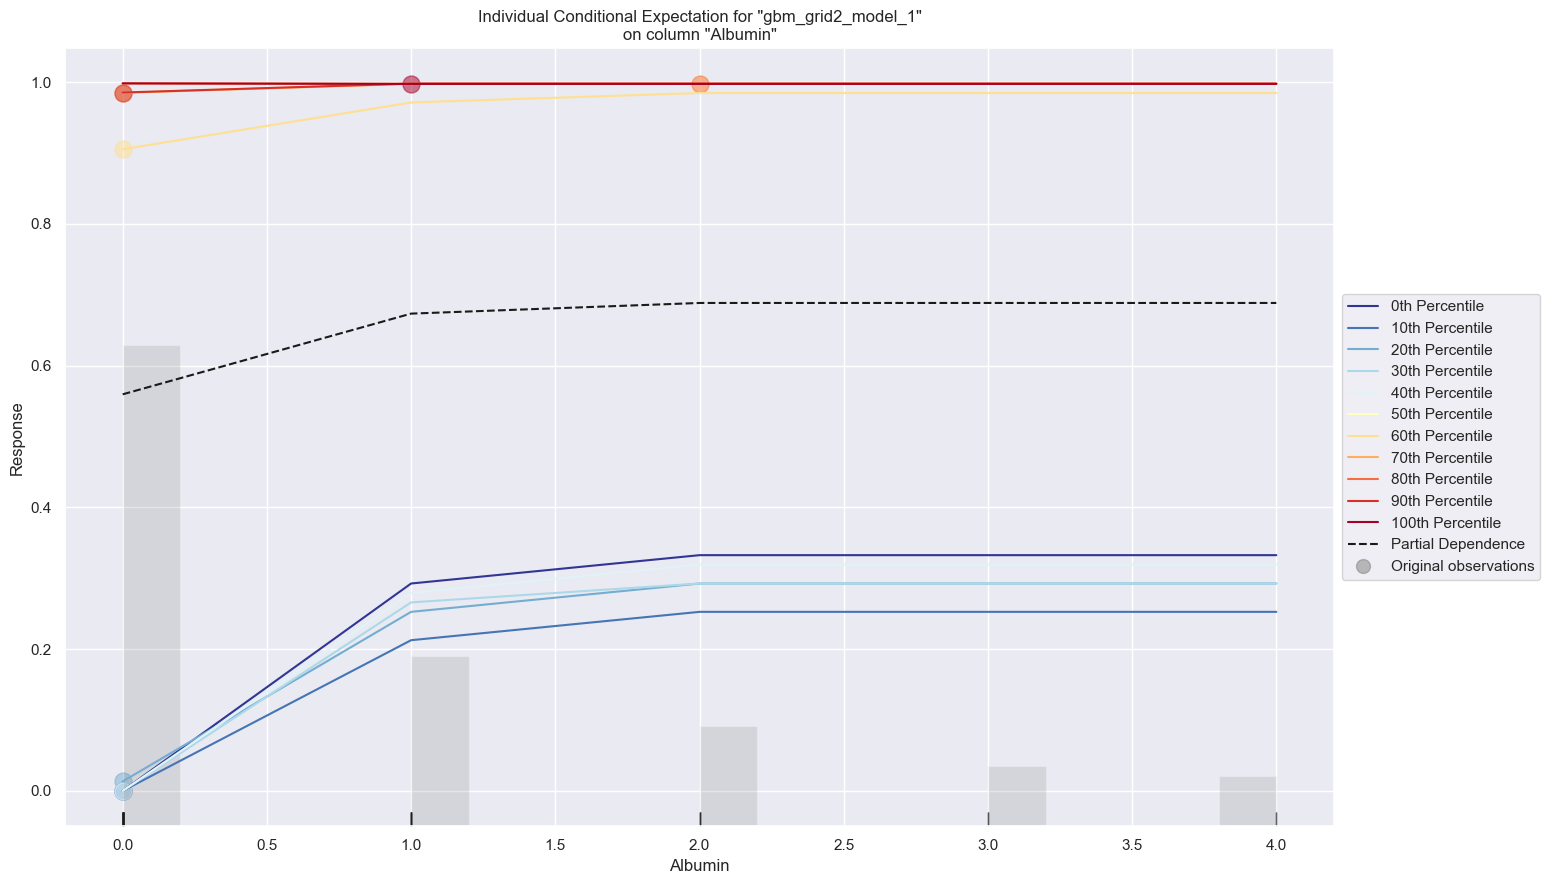

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [76]:
best_model.explain(autoML[1])  # AutoML Explainability

## How are errors/residuals distributed and how interpretable is your model ?

### Residual Analysis
Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the above graph that residuals are normally distributed. Visuals signify that residuals don't have heteroscedasticity since the plot has striped lines and there is no cone shaped residual plot.

### Variable Importance
In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. That is Hemoglobin is the most important feature 

### SHAP Summary
From the SHAP summary diagram, we can interpret a few conclusions -

1. All the features are listed as per their importance in making the prediction, that is Specific Gravity is more significant followed by Hemoglobin, and so on. Hence, Potassium is the least significant predictor in our model.
2. The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see person having highest specific highest gravity is more prone to chronic kidney disease. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Higher the specific gravity more will be the chances of person being prone to disease, a lower the Hemoglobin in the body results in high chances of disease, and so on. As we can see the distribution of red points in the Specific gravity and hemoglobin features are far more spread than the blue points.
3. From this visual, we can interpret that the chances of person getting disease increases as the Specific Gravity in blood increases. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect in predicting the kidney disease. The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

### Partial Dependence Plot (PDP)
A partial dependence plot shows the marginal effect of a feature on the target(Chronic Kidney Disease in out dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - Specific Gravity and Hemoglobin.

1. As we can see that when the rest of the variables are kept constant and a marginal change is made in Hemoglobin, we can see the mean response decreases between Hemoglobin levels of 12 to 18.

2. Similarly when the rest of the variables are kept constant and a marginal change is made in Specific Gravity we can observe the mean response of disease going down between the range of 1.0150 to 0.0175 . Hence, it can be interpreted that this range is deciding factor in the predicting disease.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

### ICE (Individual Conditional Expectation) Plot

ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Let us go back to the Hemoglobin and Specific Gravity, as we interpreted in PDP the person having diseases decreases when Hemoglobin and Specific Gravity value is between 12 to 18 and 1.0150 to 0.0175 respectively. But is this true for every individual in the dataset? ICE plot has an answer to this question.

Each line in an ICE plot represents the predicted value of the response variable for a single instance as the predictor variable changes. By looking at these lines together, you can get a sense of how the relationship between the predictor and response variables varies across different instances in the dataset.

As we can see in the ICE plot above the Chronic Kidney Disease parameter(target variable) of a few instances in data set(0th percentile instance) is constant first and decreases in this range while the target variable of a few instances doesn't change much(100th Percentile Instance).

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.

### Observations
The AutoML's best model with its Hyperparameter's tuned is the best model for this task as it has the highest accuracy of 100 % compared to the other models tested in this excercise. Also, this model is interpretible i.e. we can actually get to the root of what made this prediction to come to.


### Learning Outcomes

- The results obtained from the experiments showed promising predictive performance, with the models achieving high Accuracyand    precision.
- The complete lifecycle of a Data Science project right from data prepartion to hyperparameter tuning is what I gained from previous Assignments
- Majority of the time should be invested in data preparation i.e. cleaning the data, normalizing, feature selection, imputation   etc
- Feature importance analysis revealed that certain key features, such as ,Hemoglobin, Blood pressure, and Serum Creatinine, were important in predicting Chronic Kidney Disease. 
- Model evaluation and comparison helped in identifying the best-performing model for Kidney Disease prediction.

- Model Interpretation is the best takeaway from the series of these assignments. SHAP, LIME and PDP have made it easier to understand what made a model to predict a outcome.

In summary, this project demonstrated the potential of machine learning techniques in predicting Chronic Kidney Disease and highlighted the importance of data exploration, preprocessing, and model evaluation in the prediction process. The findings of this project may have implications in the early detection and management of CKD, potentially leading to improved patient outcomes. 





#  Citations

1.Many techniques used in this notebook have been adopted from the following github repositories

Owner - AI Skunkworks
Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown
Link - https://github.com/nikbearbrown/

2.Automated Machine Learning with H20
Link - https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

3.Explain Your Model with the SHAP Values
Link - https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

4.Interpretability Methods in Machine Learning: A Brief Survey
Link- https://www.twosigma.com/articles/interpretability-methods-in-machine-learning-a-brief-survey/

# Licensing

Copyright 2023 Akshatha Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.